<a href="https://colab.research.google.com/github/Bhargavi0210/Google-Play-store-Analytics/blob/main/IPL_cricket_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np

In [35]:
deliveries_df = pd.read_csv('/content/deliveries.csv')

In [36]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3.0,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [37]:
matches_df = pd.read_csv('/content/matches.csv')
matches_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [38]:
deliveries_df.shape

(20339, 17)

In [39]:
deliveries_df.shape

(20339, 17)

In [40]:

deliveries=deliveries_df.copy()
matches=matches_df.copy()

In [41]:
#ipl data anlysis
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [42]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [43]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [44]:
matches.describe(include='object')

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,super_over,method,umpire1,umpire2
count,1095,1044,1095,1095,1090,1095,1095,1095,1095,1095,1090,1095,1095,21,1095,1095
unique,17,36,823,8,291,58,19,19,19,2,19,4,2,1,62,62
top,2013,Mumbai,2008-04-26,League,AB de Villiers,Eden Gardens,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,N,D/L,AK Chaudhary,S Ravi
freq,76,173,2,1029,25,77,135,138,143,704,144,578,1081,21,115,83


In [45]:
#basic data analysis and data cleaning
matches=matches.dropna(subset=['winner'])
matches['player_of_match']=matches['player_of_match'].fillna('unknown')

In [46]:
#drop unwanted colums from datasets
matches.drop(['id','city','method'],axis=1,inplace=True)

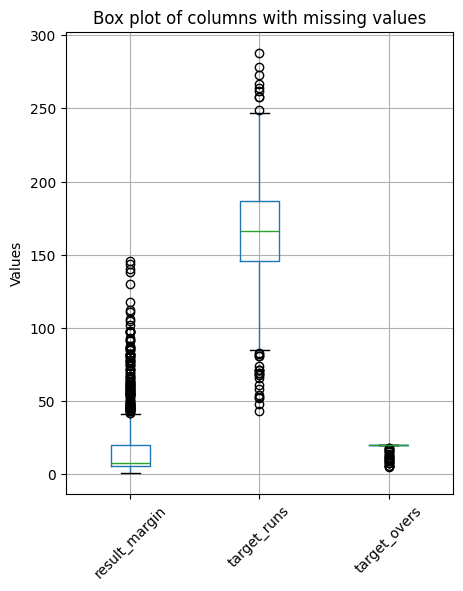

In [47]:
import matplotlib.pyplot as plt
columns_to_handle_missing=['result_margin','target_runs','target_overs']
#plot box plotss for each columns
plt.figure(figsize=(5,6))
matches[columns_to_handle_missing].boxplot()
plt.title('Box plot of columns with missing values')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [48]:
matches['result_margin'].median()
matches['result_margin']=matches['result_margin'].fillna(matches['result_margin'].median())

In [49]:
matches['target_overs']=matches['target_overs'].fillna(matches['target_overs'].median())
matches['target_runs']=matches['target_runs'].fillna(matches['target_runs'].median())

In [50]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           1090 non-null   object 
 1   date             1090 non-null   object 
 2   match_type       1090 non-null   object 
 3   player_of_match  1090 non-null   object 
 4   venue            1090 non-null   object 
 5   team1            1090 non-null   object 
 6   team2            1090 non-null   object 
 7   toss_winner      1090 non-null   object 
 8   toss_decision    1090 non-null   object 
 9   winner           1090 non-null   object 
 10  result           1090 non-null   object 
 11  result_margin    1090 non-null   float64
 12  target_runs      1090 non-null   float64
 13  target_overs     1090 non-null   float64
 14  super_over       1090 non-null   object 
 15  umpire1          1090 non-null   object 
 16  umpire2          1090 non-null   object 
dtypes: float64(3), obje

In [51]:
matches.nunique()

,0
season,17
date,821
match_type,8
player_of_match,291
venue,58
team1,19
team2,19
toss_winner,19
toss_decision,2
winner,19


In [52]:
#feature engineering
matches_df.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [53]:
matches.tail()

,season,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
1090,2024,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,Nitin Menon,VK Sharma
1091,2024,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,AK Chaudhary,R Pandit
1092,2024,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,2024,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Nitin Menon,VK Sharma
1094,2024,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,J Madanagopal,Nitin Menon


In [54]:
#function to split season values
def split_season(season):
    if '/' in season:
        start, end = season.split('/')
        start = int(start)
        end = int('20'+end) if len(end)==2 else int(end)
    else:
        start = end = int(season)
    return start, end   # return outside the if-else


In [55]:
#apply the function to  create new columns
matches[['season_start','season_end']]=matches['season'].apply(lambda x:pd.Series(split_season(x)))

In [56]:
matches.head()



,season,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,season_start,season_end
0,2007/08,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,2007,2008
1,2007/08,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri,2007,2008
2,2007/08,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar,2007,2008
3,2007/08,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper,2007,2008
4,2007/08,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan,2007,2008


In [57]:
#convert to datetime and extract year
matches['season_start']=pd.to_datetime(matches['season_start'],format='%Y').dt.year
matches['season_end']=pd.to_datetime(matches['season_end'],format='%Y').dt.year

In [58]:
matches['winner'].unique()


array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [59]:
#mapping dictionary for old names to standardize names
team_name_mapping={
    'Delhi Daredevils':'Delhi Capitals',
    'Kings XI Punjab':'Punjab Kings',
    'Rising Pune Supergiants':'Pune Warriors',
    'Gujarat Lions':'Gujarat Titans',
    'Rising Pune Supergiant':'Pune Warriors',
    'Deccan Chargers':'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru':'Royal Challengers Bangalore'
}

In [60]:
team_columns=['winner','team1','team2','toss_winner']
#replace the team names in the winner columns
matches[team_columns]=matches[team_columns].replace(team_name_mapping)
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           1090 non-null   object 
 1   date             1090 non-null   object 
 2   match_type       1090 non-null   object 
 3   player_of_match  1090 non-null   object 
 4   venue            1090 non-null   object 
 5   team1            1090 non-null   object 
 6   team2            1090 non-null   object 
 7   toss_winner      1090 non-null   object 
 8   toss_decision    1090 non-null   object 
 9   winner           1090 non-null   object 
 10  result           1090 non-null   object 
 11  result_margin    1090 non-null   float64
 12  target_runs      1090 non-null   float64
 13  target_overs     1090 non-null   float64
 14  super_over       1090 non-null   object 
 15  umpire1          1090 non-null   object 
 16  umpire2          1090 non-null   object 
 17  season_start     10

In [61]:
teams = pd.concat([matches['team1'],matches['team2']]).unique()
team_stats=pd.DataFrame(teams,columns=['team_name'])
team_stats


,team_name
0,Royal Challengers Bangalore
1,Punjab Kings
2,Delhi Capitals
3,Mumbai Indians
4,Kolkata Knight Riders
5,Rajasthan Royals
6,Sunrisers Hyderabad
7,Chennai Super Kings
8,Kochi Tuskers Kerala
9,Pune Warriors


In [62]:
#calculate matches played and won
team_stats['matches_played']=team_stats['team_name'].apply(lambda x:len(matches[(matches['team1']==x) | (matches['team2']==x)]))
team_stats['matches_won']=team_stats['team_name'].apply(lambda x:len(matches[matches['winner']==x]))
team_stats['win_percentage']=(team_stats['matches_won']/team_stats['matches_played'])*100
team_stats

,team_name,matches_played,matches_won,win_percentage
0,Royal Challengers Bangalore,252,123,48.809524
1,Punjab Kings,246,112,45.528455
2,Delhi Capitals,250,115,46.000000
3,Mumbai Indians,261,144,55.172414
4,Kolkata Knight Riders,251,131,52.191235
5,Rajasthan Royals,219,112,51.141553
6,Sunrisers Hyderabad,257,117,45.525292
7,Chennai Super Kings,237,138,58.227848
8,Kochi Tuskers Kerala,14,6,42.857143
9,Pune Warriors,75,27,36.000000


In [63]:
team_stats['total_runs_scored']=team_stats['team_name'].apply(lambda x:matches[matches['team1']==x]['target_runs'].sum()+matches[matches['team2']==x]['target_runs'].sum())
team_stats['total_wickets_taken']=team_stats['team_name'].apply(lambda x:matches[matches['team1']==x]['target_overs'].sum()+matches[matches['team2']==x]['target_overs'].sum())

team_stats['total_runs_scored']=team_stats['total_runs_scored'].astype(int)
team_stats['total_wickets_taken']=team_stats['total_wickets_taken'].astype(int)
team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975
1,Punjab Kings,246,112,45.528455,41178,4854
2,Delhi Capitals,250,115,46.000000,41234,4920
3,Mumbai Indians,261,144,55.172414,43728,5214
4,Kolkata Knight Riders,251,131,52.191235,40557,4907
5,Rajasthan Royals,219,112,51.141553,36187,4358
6,Sunrisers Hyderabad,257,117,45.525292,42118,5080
7,Chennai Super Kings,237,138,58.227848,39503,4693
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277
9,Pune Warriors,75,27,36.000000,11514,1471


In [64]:
team_stats['average_runs_scored_per_match']=team_stats['total_runs_scored']/team_stats['matches_played']
team_stats['run_rate']=team_stats['team_name'].apply(lambda x:deliveries[deliveries['batting_team']==x]['total_runs'].sum()/(deliveries[deliveries['batting_team']==x].shape[0]/6))
team_stats['economy_rate']=team_stats['team_name'].apply(lambda x:deliveries[deliveries['bowling_team']==x]['total_runs'].sum()/(deliveries[deliveries['bowling_team']==x].shape[0]/6))

team_stats

/tmp/ipython-input-3071458502.py:2: RuntimeWarning: invalid value encountered in scalar divide
  team_stats['run_rate']=team_stats['team_name'].apply(lambda x:deliveries[deliveries['batting_team']==x]['total_runs'].sum()/(deliveries[deliveries['batting_team']==x].shape[0]/6))
/tmp/ipython-input-3071458502.py:3: RuntimeWarning: invalid value encountered in scalar divide
  team_stats['economy_rate']=team_stats['team_name'].apply(lambda x:deliveries[deliveries['bowling_team']==x]['total_runs'].sum()/(deliveries[deliveries['bowling_team']==x].shape[0]/6))


,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,7.148643,7.864802
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,NaN,NaN
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,NaN,NaN
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,7.721269,7.452632
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.221907,7.648438
5,Rajasthan Royals,219,112,51.141553,36187,4358,165.237443,7.925157,7.375494
6,Sunrisers Hyderabad,257,117,45.525292,42118,5080,163.883268,NaN,NaN
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.076503,7.889589
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,NaN,NaN
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,NaN,NaN


In [65]:
#Exclude no result matches from deliveries
no_result_match_ids=[501265,829763,829813,1178424,1359519]
filtered_deliveries=deliveries[deliveries['match_id'].isin(no_result_match_ids)]

#highest and lowest scores excluding no result matches
highest_scores=filtered_deliveries.groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()
team_stats['highest_score']=team_stats['team_name'].apply(lambda x:highest_scores[highest_scores['batting_team']==x]['total_runs'].max())
team_stats['lowest_score']=team_stats['team_name'].apply(lambda x:highest_scores[highest_scores['batting_team']==x]['total_runs'].min())
team_stats


,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,7.148643,7.864802,NaN,NaN
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,NaN,NaN,NaN,NaN
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,NaN,NaN,NaN,NaN
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,7.721269,7.452632,NaN,NaN
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.221907,7.648438,NaN,NaN
5,Rajasthan Royals,219,112,51.141553,36187,4358,165.237443,7.925157,7.375494,NaN,NaN
6,Sunrisers Hyderabad,257,117,45.525292,42118,5080,163.883268,NaN,NaN,NaN,NaN
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.076503,7.889589,NaN,NaN
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,NaN,NaN,NaN,NaN
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,NaN,NaN,NaN,NaN


In [66]:
#total 4s and 6s
team_stats['total_4s']=team_stats['team_name'].apply(lambda x : deliveries[(deliveries['batting_team']==x)&(filtered_deliveries['batsman_runs']==4)].shape[0])
team_stats['total_6s']=team_stats['team_name'].apply(lambda x : deliveries[(deliveries['batting_team']==x)&(filtered_deliveries['batsman_runs']==6)].shape[0])
# average powerplay and death over scores
powerplay_scores = deliveries[(deliveries['over']<=6)].groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()
death_overs_scores = deliveries[(deliveries['over']>15)].groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()

team_stats['average_powerplay_score']=team_stats['team_name'].apply(lambda x: powerplay_scores[powerplay_scores['batting_team']==x]['total_runs'].mean())
team_stats['average_death_overs_score']=team_stats['team_name'].apply(lambda x: death_overs_scores[death_overs_scores['batting_team']==x]['total_runs'].mean())
team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,7.148643,7.864802,NaN,NaN,0,0,44.909091,35.473684
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,NaN,NaN,NaN,NaN,0,0,NaN,NaN
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,7.721269,7.452632,NaN,NaN,0,0,52.150000,39.937500
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.221907,7.648438,NaN,NaN,0,0,46.476190,40.058824
5,Rajasthan Royals,219,112,51.141553,36187,4358,165.237443,7.925157,7.375494,NaN,NaN,0,0,51.869565,30.800000
6,Sunrisers Hyderabad,257,117,45.525292,42118,5080,163.883268,NaN,NaN,NaN,NaN,0,0,NaN,NaN
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.076503,7.889589,NaN,NaN,0,0,56.347826,38.380952
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,NaN,NaN,NaN,NaN,0,0,NaN,NaN
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,NaN,NaN,NaN,NaN,0,0,NaN,NaN


In [67]:
#feature extraction for deliveries dataset
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3.0,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [68]:
# add balls faced
batgroup=deliveries.groupby(['batter'])
batsman_stats=pd.DataFrame(batgroup['ball'].count()).rename(columns={'ball':'balls_faced'})
batsman_stats.head()

,balls_faced
batter,
A Chopra,75
A Flintoff,57
A Kumble,30
A Mishra,54
A Mukund,1


In [69]:
# add innings
batsman_stats['innings']=batgroup['inning'].nunique()
batsman_stats.head()

,balls_faced,innings
batter,,
A Chopra,75,2
A Flintoff,57,2
A Kumble,30,2
A Mishra,54,2
A Mukund,1,1


In [70]:
# add runs
batsman_stats['runs']=batgroup['batsman_runs'].sum()
batsman_stats.head()

,balls_faced,innings,runs
batter,,,
A Chopra,75,2,53.0
A Flintoff,57,2,62.0
A Kumble,30,2,21.0
A Mishra,54,2,48.0
A Mukund,1,1,0.0


In [71]:
# Add 0s
batsman_stats['0s'] = deliveries[deliveries['batsman_runs'] == 0].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'0s':0},inplace=True)
batsman_stats['0s'] = batsman_stats['0s'].astype(int)
# Add 1s
batsman_stats['1s'] = deliveries[deliveries['batsman_runs'] == 1].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'1s':0},inplace=True)
batsman_stats['1s'] = batsman_stats['1s'].astype(int)
# Add 2s
batsman_stats['2s'] = deliveries[deliveries['batsman_runs'] == 2].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'2s':0},inplace=True)
batsman_stats['2s'] = batsman_stats['2s'].astype(int)
# Add 3s
batsman_stats['3s'] = deliveries[deliveries['batsman_runs'] == 3].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'3s':0},inplace=True)
batsman_stats['3s'] = batsman_stats['3s'].astype(int)
# Add 4s
batsman_stats['4s'] = deliveries[deliveries['batsman_runs'] == 4].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'4s':0},inplace=True)
batsman_stats['4s'] = batsman_stats['4s'].astype(int)
# Add 6s
batsman_stats['6s'] = deliveries[deliveries['batsman_runs'] == 6].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'6s':0},inplace=True)
batsman_stats['6s'] = batsman_stats['6s'].astype(int)
# Show first few rows
batsman_stats.head()


,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s
batter,,,,,,,,,
A Chopra,75,2,53.0,45,21,2,0,7,0
A Flintoff,57,2,62.0,24,23,2,1,5,2
A Kumble,30,2,21.0,16,11,1,0,2,0
A Mishra,54,2,48.0,25,22,2,0,4,1
A Mukund,1,1,0.0,1,0,0,0,0,0


In [72]:
# add highest score
# Add 'highest_score'
batsman_stats['highest_score'] = deliveries.groupby(['batter', 'match_id'])['batsman_runs'].sum().groupby('batter').max()
batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score
batter,,,,,,,,,,
A Chopra,75,2,53.0,45,21,2,0,7,0,24.0
A Flintoff,57,2,62.0,24,23,2,1,5,2,24.0
A Kumble,30,2,21.0,16,11,1,0,2,0,8.0
A Mishra,54,2,48.0,25,22,2,0,4,1,31.0
A Mukund,1,1,0.0,1,0,0,0,0,0,0.0


In [73]:
#Add 'player_out'
batsman_stats['player_out']=batgroup['is_wicket'].count()
batsman_stats.head()

batsman_stats['player_out']=deliveries[deliveries['is_wicket']==1].groupby('batter')['is_wicket'].count()
batsman_stats.fillna({'player_out':0},inplace=True)
batsman_stats['player_out']=batsman_stats['player_out'].astype(int)
batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score,player_out
batter,,,,,,,,,,,
A Chopra,75,2,53.0,45,21,2,0,7,0,24.0,5
A Flintoff,57,2,62.0,24,23,2,1,5,2,24.0,2
A Kumble,30,2,21.0,16,11,1,0,2,0,8.0,2
A Mishra,54,2,48.0,25,22,2,0,4,1,31.0,5
A Mukund,1,1,0.0,1,0,0,0,0,0,0.0,1


In [74]:
# Add 'batting_avg'
batsman_stats['batting_avg'] = batsman_stats.apply(lambda row: round(row['runs'] / row['player_out'], 2) if row['player_out'] > 0 else 0,axis=1)

# Add 'batting_strike_rate'
batsman_stats['batting_strike_rate'] = batsman_stats.apply(lambda row: round((row['runs'] / row['balls_faced']) * 100, 2) if row['balls_faced'] > 0 else 0,axis=1)

batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score,player_out,batting_avg,batting_strike_rate
batter,,,,,,,,,,,,,
A Chopra,75,2,53.0,45,21,2,0,7,0,24.0,5,10.6,70.67
A Flintoff,57,2,62.0,24,23,2,1,5,2,24.0,2,31.0,108.77
A Kumble,30,2,21.0,16,11,1,0,2,0,8.0,2,10.5,70.00
A Mishra,54,2,48.0,25,22,2,0,4,1,31.0,5,9.6,88.89
A Mukund,1,1,0.0,1,0,0,0,0,0,0.0,1,0.0,0.00


In [75]:
# Add 'balls_throw'
bowlgroup = deliveries.groupby(['bowler'])
bowler_stats = pd.DataFrame(bowlgroup['ball'].count()).rename(columns={'ball': 'balls_throw'})

bowler_stats.head()

,balls_throw
bowler,
A Flintoff,66
A Kumble,412
A Mishra,241
A Nehra,433
A Nel,18


In [76]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket'], dtype=object)

In [77]:
# Add 'wickets'
wickets = deliveries[deliveries['dismissal_kind'].isin(['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'])]
bowler_stats['wickets'] = wickets.groupby(['bowler'])['ball'].count()
bowler_stats.fillna({'wickets': 0}, inplace=True)
bowler_stats['wickets'] = bowler_stats['wickets'].astype(int)

bowler_stats.head()

,balls_throw,wickets
bowler,,
A Flintoff,66,2
A Kumble,412,17
A Mishra,241,16
A Nehra,433,22
A Nel,18,1


In [78]:
# Add 'overs'
bowler_stats['overs'] = round(bowler_stats['balls_throw']/6).astype(int)
bowler_stats.fillna({'overs': 0}, inplace=True)

bowler_stats.head()

,balls_throw,wickets,overs
bowler,,,
A Flintoff,66,2,11
A Kumble,412,17,69
A Mishra,241,16,40
A Nehra,433,22,72
A Nel,18,1,3


In [79]:
# Add 'runs_conceded'
bowler_stats['runs_conceded'] = deliveries.groupby('bowler')['batsman_runs'].sum()
bowler_stats.fillna({'runs_conceded': 0}, inplace=True)

# Add extra_runs to the 'runs_conceded'
bowler_stats['runs_conceded'] = bowler_stats['runs_conceded'].add(deliveries[deliveries['extras_type'].isin(['wides', 'noballs'])].groupby('bowler')['extra_runs'].sum(),fill_value=0)
bowler_stats['runs_conceded'] = bowler_stats['runs_conceded'].astype(int)

bowler_stats.head()

,balls_throw,wickets,overs,runs_conceded
bowler,,,,
A Flintoff,66,2,11,105
A Kumble,412,17,69,474
A Mishra,241,16,40,265
A Nehra,433,22,72,518
A Nel,18,1,3,31


In [80]:
# Add 'bowling_econ'
bowler_stats['bowling_econ'] = bowler_stats.apply(lambda row: round(row['runs_conceded'] / row['overs'], 2) if row['overs'] > 0 else float('inf'),axis=1)

# Add 'bowling_strike_rate'
bowler_stats['bowling_strike_rate'] = bowler_stats.apply(lambda row: round(row['balls_throw'] / row['wickets'], 2) if row['wickets'] > 0 else float('inf'),axis=1)

bowler_stats.head()

,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate
bowler,,,,,,
A Flintoff,66,2,11,105,9.55,33.00
A Kumble,412,17,69,474,6.87,24.24
A Mishra,241,16,40,265,6.62,15.06
A Nehra,433,22,72,518,7.19,19.68
A Nel,18,1,3,31,10.33,18.00


In [81]:
players_dict = {}

# Iterate over each row in the dataframe
for i, row in deliveries.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_dict:
        players_dict[row['batter']].add(row['match_id'])
    else:
        players_dict[row['batter']] = {row['match_id']}

    # Check if the non-striker is already in the dictionary
    if row['non_striker'] in players_dict:
        players_dict[row['non_striker']].add(row['match_id'])
    else:
        players_dict[row['non_striker']] = {row['match_id']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_dict:
        players_dict[row['bowler']].add(row['match_id'])
    else:
        players_dict[row['bowler']] = {row['match_id']}

# Create a dataframe with players and their number of matches
players = pd.DataFrame({'players': list(players_dict.keys())})
players['matches'] = players['players'].apply(lambda x: len(players_dict[x]))
players = players.set_index('players')

players.head()

,matches
players,
SC Ganguly,20
BB McCullum,12
P Kumar,20
Z Khan,17
AA Noffke,1


In [82]:
# Catches Caught by Players
outbyCatch = deliveries[deliveries['dismissal_kind'].isin(['caught and bowled'])].groupby('bowler')['ball'].count().rename('bowler_catches')
justCatch = deliveries[deliveries['dismissal_kind'].isin(['caught'])].groupby('fielder')['ball'].count().rename('fielder_catches')

catches = pd.merge(outbyCatch, justCatch, left_index=True, right_index=True, how='outer')
catches.fillna(0, inplace=True)

catches['catches'] = catches['bowler_catches'] + catches['fielder_catches']
catches.drop(['bowler_catches', 'fielder_catches'], axis=1, inplace=True)
catches['catches'] = catches['catches'].astype(int)

catches.head()


,catches
A Chopra,2
A Flintoff,4
A Kumble,5
A Mishra,1
A Mukund,3


In [83]:
# Merging Batsman Stats
players = pd.merge(players, batsman_stats, left_index=True, right_index=True, how='outer')

# Merging Bowler Stats
players = pd.merge(players, bowler_stats, left_index=True, right_index=True, how='outer')

# Merging Catches Stats of Each Player
players = pd.merge(players, catches, left_index=True, right_index=True, how='outer')

# Merging the data of players who got Man of the Match or not
players = players.merge(matches['player_of_match'].value_counts().rename('man_of_the_match_count'), left_index=True, right_index=True, how='left').fillna(0)

# Making all the NaN values to 0 because they don't have the values like a person who does not get Player of the Match is marked as NaN so I Make it 0
players.fillna(0, inplace=True)

players.head()


,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,...,batting_avg,batting_strike_rate,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate,catches,man_of_the_match_count
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,...,10.6,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Flintoff,3.0,57.0,2.0,62.0,24.0,23.0,2.0,1.0,5.0,2.0,...,31.0,108.77,66.0,2.0,11.0,105.0,9.55,33.00,4.0,0.0
A Kumble,18.0,30.0,2.0,21.0,16.0,11.0,1.0,0.0,2.0,0.0,...,10.5,70.00,412.0,17.0,69.0,474.0,6.87,24.24,5.0,3.0
A Mishra,11.0,54.0,2.0,48.0,25.0,22.0,2.0,0.0,4.0,1.0,...,9.6,88.89,241.0,16.0,40.0,265.0,6.62,15.06,1.0,12.0
A Mukund,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,3.0,0.0


In [84]:
# team performance
team_stats.head()

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,7.148643,7.864802,NaN,NaN,0,0,44.909091,35.473684
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,NaN,NaN,NaN,NaN,0,0,NaN,NaN
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,7.721269,7.452632,NaN,NaN,0,0,52.150000,39.937500
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.221907,7.648438,NaN,NaN,0,0,46.476190,40.058824


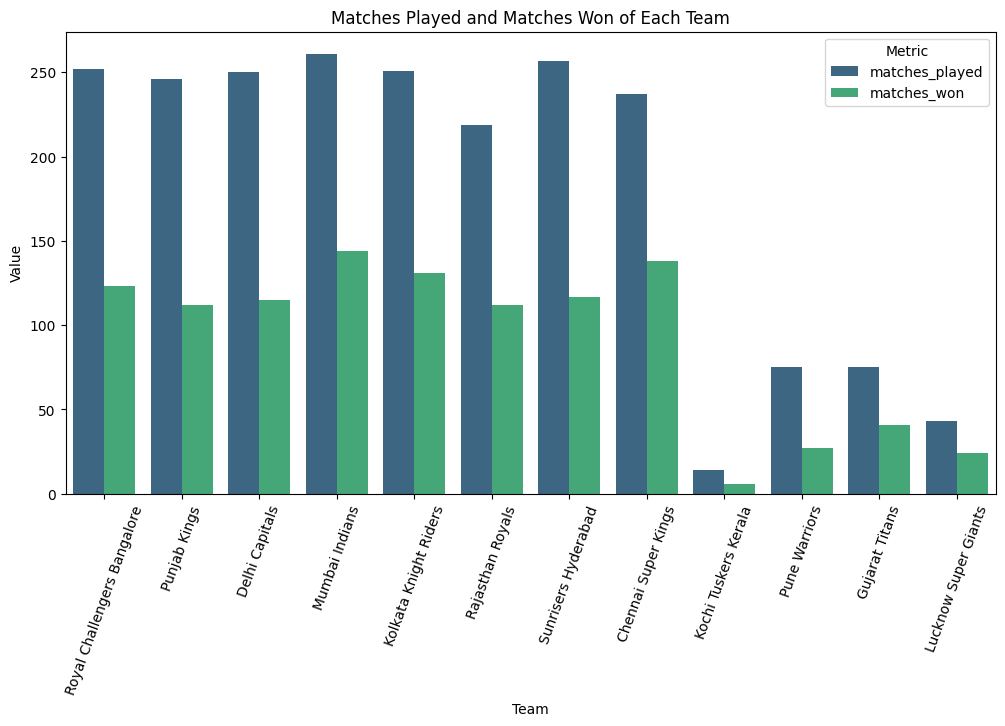

In [85]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Matches Played & Winning Percentage
team_stats_melted = team_stats.melt(id_vars=['team_name'],  value_vars=['matches_played', 'matches_won'],var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette='viridis')
plt.title('Matches Played and Matches Won of Each Team')
plt.xlabel('Team')
plt.ylabel('Value')
plt.xticks(rotation=70)
plt.legend(title='Metric')
plt.show()



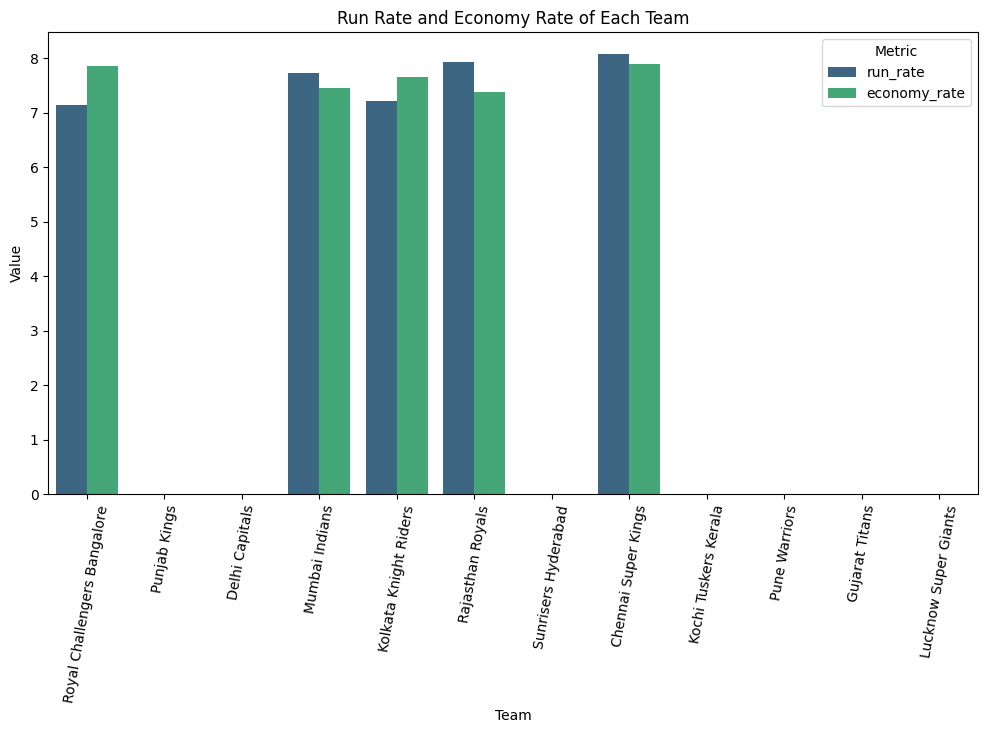

In [86]:
# Plotting Run Rate & Economy Rate
team_stats_melted = team_stats.melt(id_vars=['team_name'],  value_vars=['run_rate', 'economy_rate'], var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette='viridis')
plt.title('Run Rate and Economy Rate of Each Team')
plt.xlabel('Team')
plt.ylabel('Value')
plt.xticks(rotation=80)
plt.legend(title='Metric')
plt.show()


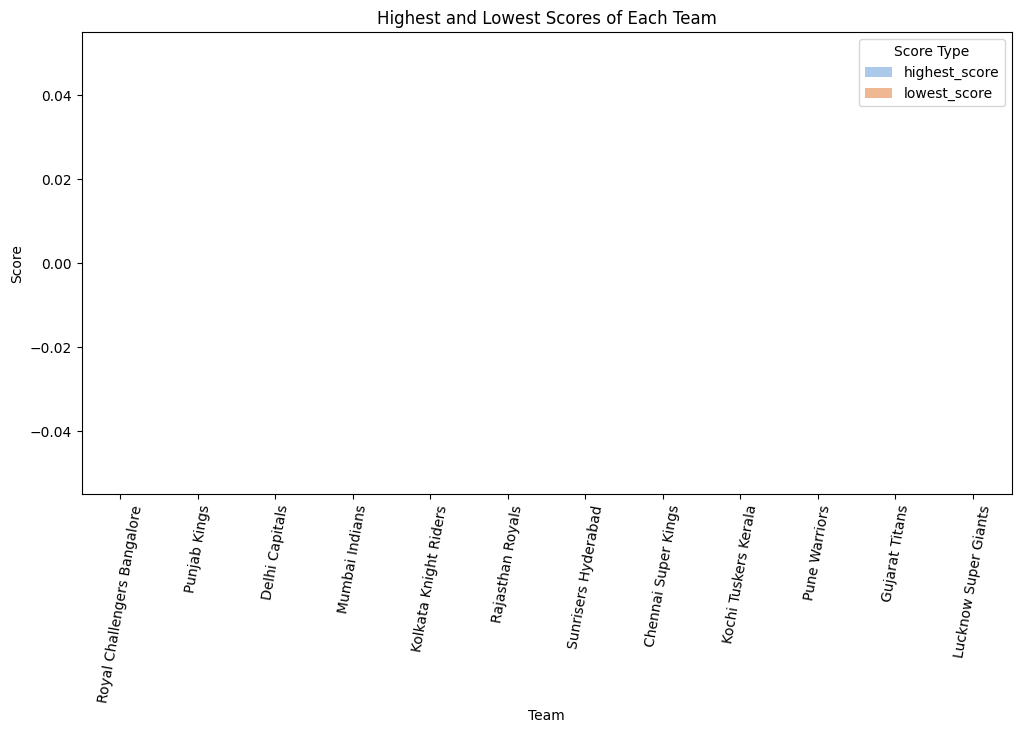

In [87]:
# Plotting Highest and Lowest Scores
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['highest_score', 'lowest_score'],var_name='Score Type',
                                    value_name='Score')

sns.barplot(x='team_name', y='Score', hue='Score Type', data=team_stats_melted, palette='pastel')
plt.title('Highest and Lowest Scores of Each Team')
plt.xlabel('Team')
plt.ylabel('Score')
plt.xticks(rotation=80)
plt.show()


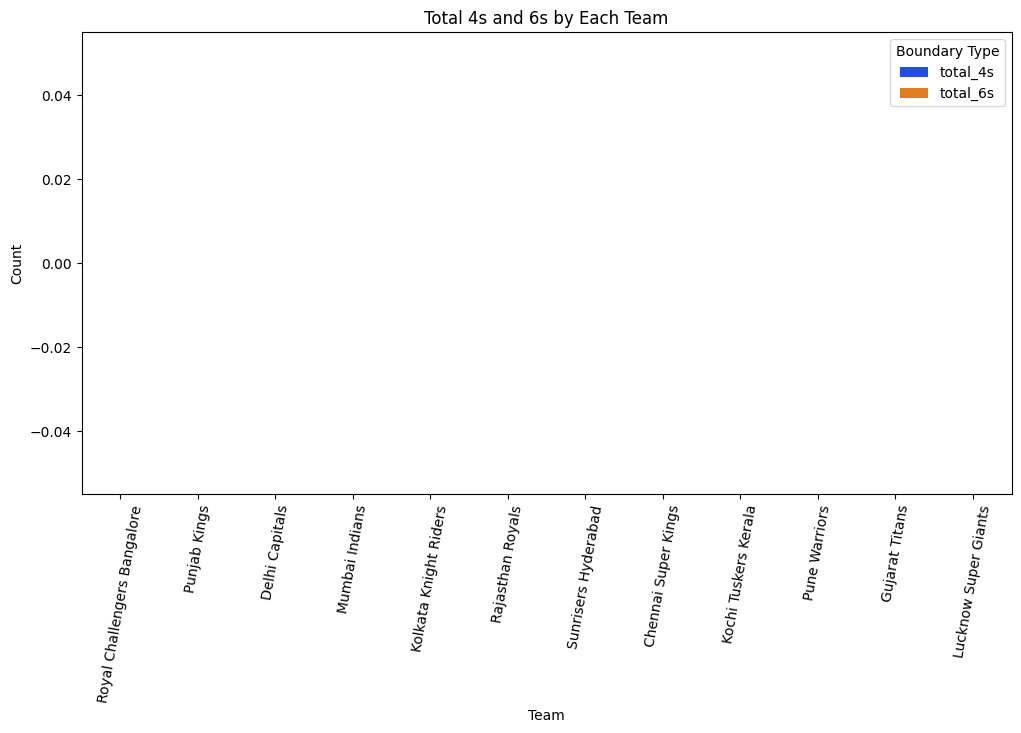

In [88]:
# Plotting Total 4s and 6s
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'],  value_vars=['total_4s', 'total_6s'],var_name='Boundary Type', value_name='Count')

sns.barplot(x='team_name', y='Count', hue='Boundary Type', data=team_stats_melted, palette='bright')
plt.title('Total 4s and 6s by Each Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()


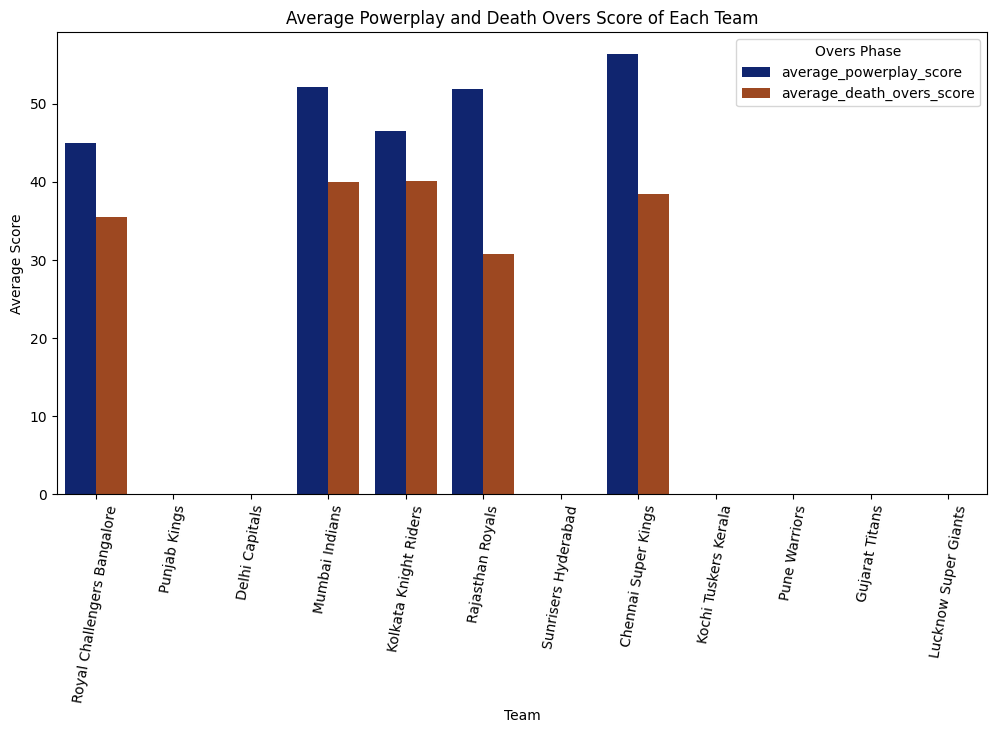

In [89]:
# Plotting Average Powerplay and Death Overs Score
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'],
                                    value_vars=['average_powerplay_score', 'average_death_overs_score'],
                                    var_name='Overs Phase', value_name='Average Score')

sns.barplot(x='team_name', y='Average Score', hue='Overs Phase', data=team_stats_melted, palette='dark')
plt.title('Average Powerplay and Death Overs Score of Each Team')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.xticks(rotation=80)
plt.show()


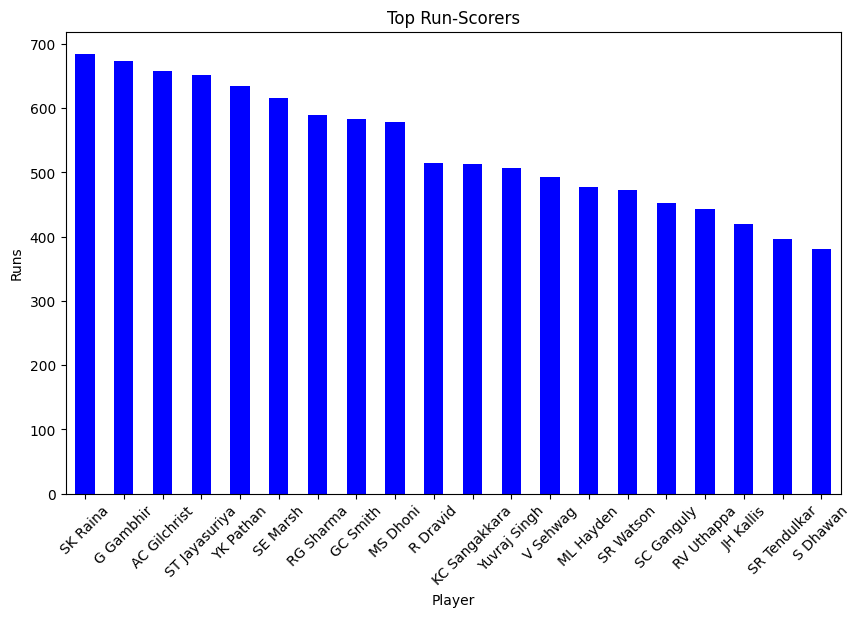

In [90]:
#player performance
# Top Run-Scorers
plt.figure(figsize=(10, 6))
top_run_scorers=players['runs'].nlargest(20)
top_run_scorers.plot(kind='bar', color='blue')
plt.xlabel('Player')
plt.ylabel('Runs')
plt.title('Top Run-Scorers')
plt.xticks(rotation=45)
plt.show()

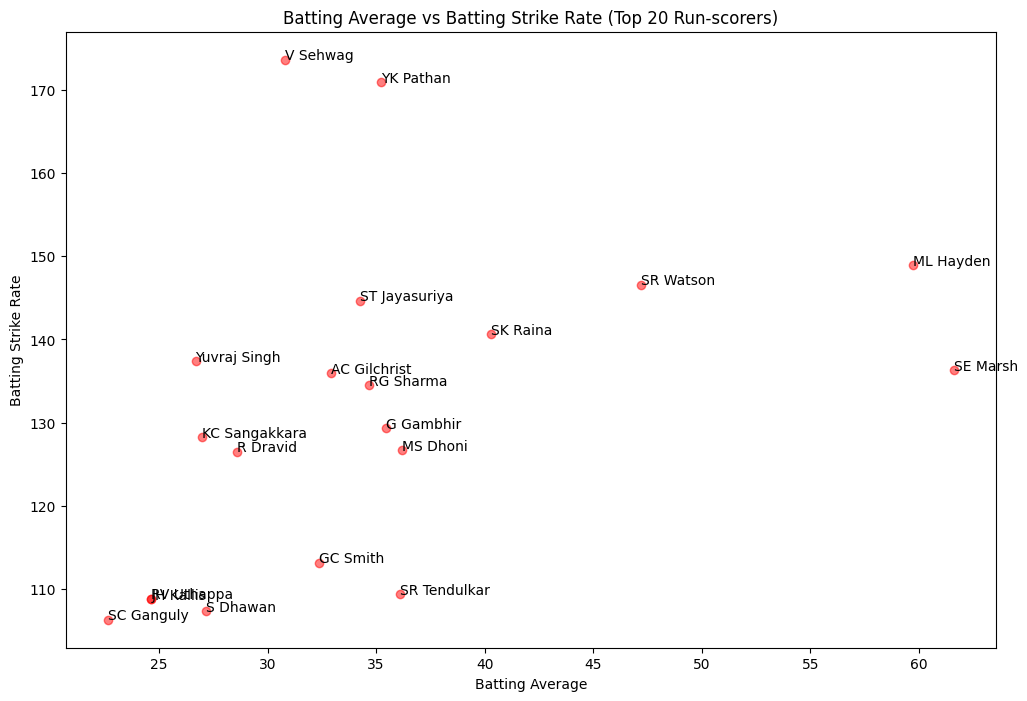

In [91]:
 # Get the top 20 run-scorers
top_run_scorers = players.nlargest(20, 'runs')
# Scatter Plot - Batting Average vs Strike Rate (for top 20 run-scorers)
plt.figure(figsize=(12, 8))
plt.scatter(top_run_scorers['batting_avg'], top_run_scorers['batting_strike_rate'], color='red', alpha=0.5)
plt.xlabel('Batting Average')
plt.ylabel('Batting Strike Rate')
plt.title('Batting Average vs Batting Strike Rate (Top 20 Run-scorers)')

# Annotate each point with player name
for i, player in top_run_scorers.iterrows():
    plt.annotate(i, (player['batting_avg'], player['batting_strike_rate']))
plt.show()

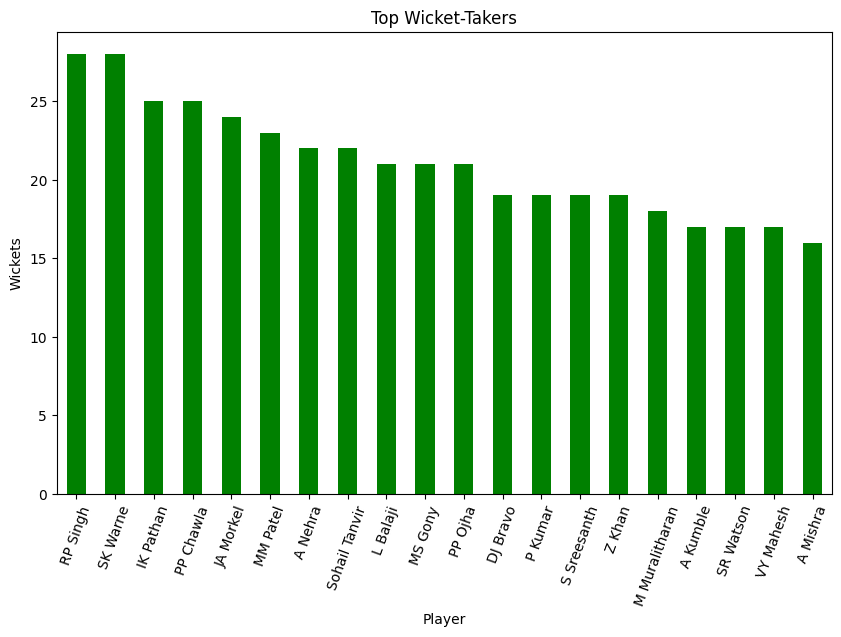

In [92]:
# Bar Plot - Top Wicket-Takers
plt.figure(figsize=(10, 6))
top_wicket_takers = players['wickets'].nlargest(20)
top_wicket_takers.plot(kind='bar', color='green')
plt.xlabel('Player')
plt.ylabel('Wickets')
plt.title('Top Wicket-Takers')
plt.xticks(rotation=70)
plt.show()

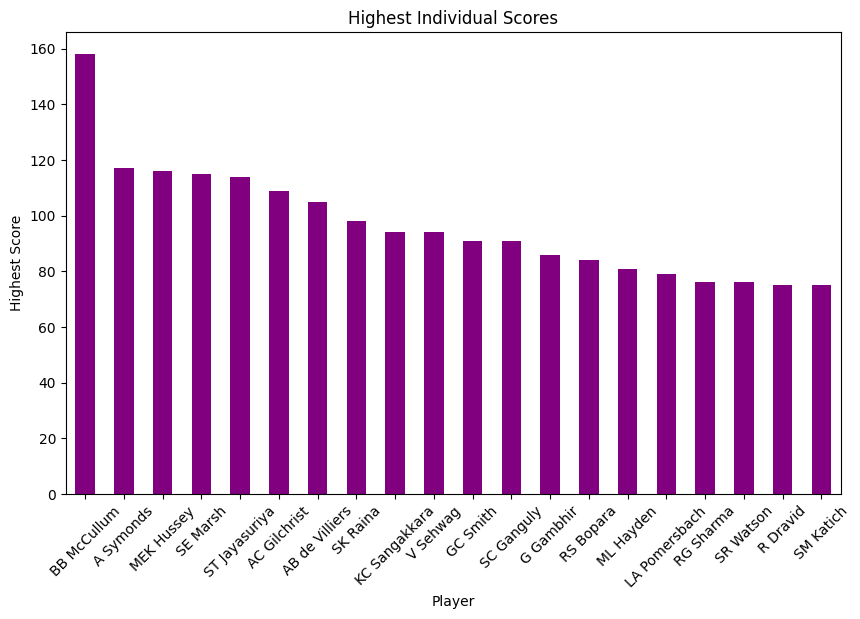

In [93]:
 # Bar Plot - Top Highest Individual Scores
plt.figure(figsize=(10, 6))
highest_scores = players['highest_score'].nlargest(20)
highest_scores.plot(kind='bar', color='purple')
plt.xlabel('Player')
plt.ylabel('Highest Score')
plt.title('Highest Individual Scores')
plt.xticks(rotation=45)
plt.show()

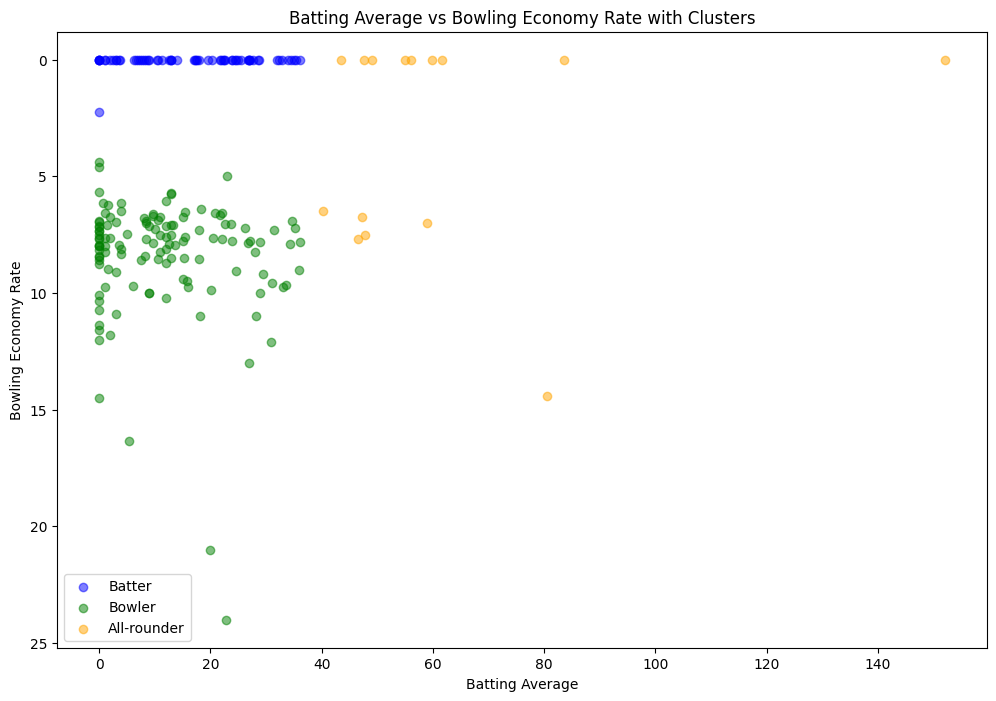

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Copy the DataFrame
players_copy = players.copy()

# Select features for clustering
players_copy = players_copy[['bowling_econ', 'batting_avg']]

# Check for NaN or infinite values
players_copy = players_copy.replace([float('inf'), -float('inf')], pd.NA)  # Replace inf with NaN
players_copy = players_copy.dropna()  # Drop rows with NaN values

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(players_copy)

# Apply K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster column to the copied DataFrame
players_copy['clusters'] = clusters

# Join cluster info back to original DataFrame
players = players.join(players_copy['clusters'], how='left', rsuffix='_cluster')

# Define cluster labels and colors
cluster_labels = {0: 'Batter', 1: 'Bowler', 2: 'All-rounder'}
colors = {'Batter': 'blue', 'Bowler': 'green', 'All-rounder': 'orange'}

# Map cluster labels to the clusters in the DataFrame
players['cluster'] = players['clusters'].map(cluster_labels)

# Ensure no NaN values in 'cluster' column before plotting
players_no_nan = players.dropna(subset=['cluster'])

# Plotting Batting Average vs Bowling Economy Rate with clusters
plt.figure(figsize=(12, 8))

for cluster in players_no_nan['cluster'].unique():
    subset = players_no_nan[players_no_nan['cluster'] == cluster]
    plt.scatter(subset['batting_avg'], subset['bowling_econ'],
                color=colors[cluster], label=cluster, alpha=0.5)

plt.xlabel('Batting Average')
plt.ylabel('Bowling Economy Rate')
plt.title('Batting Average vs Bowling Economy Rate with Clusters')
plt.gca().invert_yaxis()  # Invert y-axis to show better economy rates higher up
plt.legend()
plt.show()


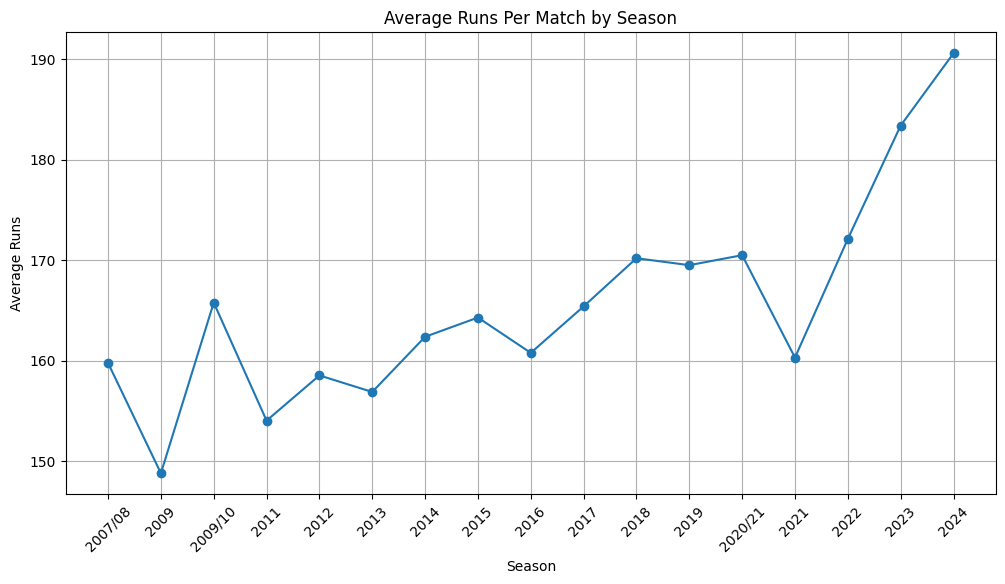

In [95]:
# seasonal analysis
# Calculate average runs per match per season
seasonal_runs = matches.groupby('season').agg({'target_runs': 'mean'}).reset_index()
seasonal_runs.columns = ['season', 'average_runs']

# Plot the average runs by season
plt.figure(figsize=(12, 6))
plt.plot(seasonal_runs['season'], seasonal_runs['average_runs'], marker='o')
plt.title('Average Runs Per Match by Season')
plt.xlabel('Season')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [96]:
# winner prediction machine learning model
# Copy dataframes
deliveries = deliveries_df.copy()
matches = matches_df.copy()

inning_scores=deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
inning_scores=inning_scores[inning_scores['inning']==1]
inning_scores.head()


# Rename match_id column in matches
matches.rename(columns={'id': 'match_id'}, inplace=True)
matches.head()

# Create target column
inning_scores['target'] = inning_scores['total_runs'] + 1
inning_scores.head()


# Merge target with matches
matches = matches.merge(inning_scores[['match_id', 'target']], on='match_id')
matches.head()


,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,target
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,223.0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,241.0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,130.0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,166.0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,111.0


In [97]:
matches['team1'].unique()
#mapping dictionary for old names to standardize names
team_name_mapping={
    'Delhi Daredevils':'Delhi Capitals',
    'Kings XI Punjab':'Punjab Kings',
    'Rising Pune Supergiants':'Pune Warriors',
    'Gujarat Lions':'Gujarat Titans',
    'Rising Pune Supergiant':'Pune Warriors',
    'Deccan Chargers':'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru':'Royal Challengers Bangalore'
}
team_columns=['winner','team1','team2','toss_winner']
#replace the team names in the winner columns
matches[team_columns]=matches[team_columns].replace(team_name_mapping)


In [98]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg'], dtype=object)

In [99]:
# Replace city names
map_city_names = {'Bengaluru': 'Bangalore'}
matches['city'] = matches['city'].replace(map_city_names)
# Check unique city names
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg'], dtype=object)

In [100]:
matches.isnull().sum()

,0
match_id,0
season,0
city,0
date,0
match_type,0
player_of_match,0
venue,0
team1,0
team2,0
toss_winner,0


In [101]:
# Extracting only selected columns
matches = matches[['match_id', 'season', 'city', 'team1', 'team2', 'winner', 'target']].dropna()
matches.head()

,match_id,season,city,team1,team2,winner,target
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0
1,335983,2007/08,Chandigarh,Punjab Kings,Chennai Super Kings,Chennai Super Kings,241.0
2,335984,2007/08,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,130.0
3,335985,2007/08,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,166.0
4,335986,2007/08,Kolkata,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,111.0


In [102]:
matches.isnull().sum()

,0
match_id,0
season,0
city,0
team1,0
team2,0
winner,0
target,0


In [103]:
# Teams that will play in 2025 season
teams_2025 = [
    'Chennai Super Kings',
    'Delhi Capitals',
    'Gujarat Titans',
    'Kolkata Knight Riders',
    'Lucknow Super Giants',
    'Mumbai Indians',
    'Punjab Kings',
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad'
]

# Extracting only the selected teams in matches
matches = matches[matches['team1'].isin(teams_2025)]
matches = matches[matches['team2'].isin(teams_2025)]
matches.head()

,match_id,season,city,team1,team2,winner,target
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0
1,335983,2007/08,Chandigarh,Punjab Kings,Chennai Super Kings,Chennai Super Kings,241.0
2,335984,2007/08,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,130.0
3,335985,2007/08,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,166.0
4,335986,2007/08,Kolkata,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,111.0


In [104]:
# Replace the team names in the batting_team & bowling_team columns
deliveries['batting_team'] = deliveries['batting_team'].replace(team_name_mapping)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(team_name_mapping)

# Keep only 2025 season teams
deliveries = deliveries[deliveries['batting_team'].isin(teams_2025)]
deliveries = deliveries[deliveries['bowling_team'].isin(teams_2025)]

deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3.0,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [105]:
# merge to final dataset
final=matches.merge(deliveries,on='match_id')
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [106]:
# get only secound innings
final =final[final['inning']==2]
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,W Jaffer,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,R Dravid,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,R Dravid,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,R Dravid,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,W Jaffer,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN


In [107]:
# add current score
# Add 'current_score'
final.loc[:, 'current_score'] = final.groupby('match_id')['total_runs'].cumsum()
final.head()


,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,W Jaffer,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,1.0
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,R Dravid,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN,2.0
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,R Dravid,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2.0
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,R Dravid,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,3.0
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,W Jaffer,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,4.0


In [108]:
# Add 'runs_left'
final.loc[:, 'runs_left'] = np.where(final['target'] - final['current_score'] >= 0, final['target'] - final['current_score'], 0)
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,1.0,222.0
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN,2.0,221.0
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2.0,221.0
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,3.0,220.0
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,4.0,219.0


In [109]:
# Add 'balls_left'
final.loc[:, 'balls_left'] = np.where(120 - final['over']*6 - final['ball'] >= 0,  120 - final['over']*6 - final['ball'], 0)
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0.0,1.0,NaN,0.0,NaN,NaN,NaN,1.0,222.0,119.0
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1.0,1.0,wides,0.0,NaN,NaN,NaN,2.0,221.0,118.0
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2.0,221.0,117.0
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0.0,1.0,NaN,0.0,NaN,NaN,NaN,3.0,220.0,116.0
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0.0,1.0,NaN,0.0,NaN,NaN,NaN,4.0,219.0,115.0


In [110]:
# Add 'wickets_left'
final.loc[:, 'wickets_left'] = 10 - final.groupby('match_id')['is_wicket'].cumsum()
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1.0,NaN,0.0,NaN,NaN,NaN,1.0,222.0,119.0,10.0
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1.0,wides,0.0,NaN,NaN,NaN,2.0,221.0,118.0,10.0
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0.0,NaN,0.0,NaN,NaN,NaN,2.0,221.0,117.0,10.0
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1.0,NaN,0.0,NaN,NaN,NaN,3.0,220.0,116.0,10.0
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1.0,NaN,0.0,NaN,NaN,NaN,4.0,219.0,115.0,10.0


In [111]:
# Calculate 'current_run_rate'
final['current_run_rate'] = np.where(
    120 - final['balls_left'] > 0,
    (final['current_score'] * 6) / (120 - final['balls_left']),
    0
)

# Calculate 'required_run_rate'
final['required_run_rate'] = np.where(
    final['balls_left'] > 0,
    (final['runs_left'] * 6) / final['balls_left'],
    np.where(final['runs_left'] > 0, 1e6, 0)
)

final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0.0,NaN,NaN,NaN,1.0,222.0,119.0,10.0,6.0,11.193277
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0.0,NaN,NaN,NaN,2.0,221.0,118.0,10.0,6.0,11.237288
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0.0,NaN,NaN,NaN,2.0,221.0,117.0,10.0,4.0,11.333333
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0.0,NaN,NaN,NaN,3.0,220.0,116.0,10.0,4.5,11.379310
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0.0,NaN,NaN,NaN,4.0,219.0,115.0,10.0,4.8,11.426087


In [112]:
# Create 'result' column
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

final['result'] = final.apply(result, axis=1)
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,1.0,222.0,119.0,10.0,6.0,11.193277,0
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,2.0,221.0,118.0,10.0,6.0,11.237288,0
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,2.0,221.0,117.0,10.0,4.0,11.333333,0
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,3.0,220.0,116.0,10.0,4.5,11.379310,0
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,4.0,219.0,115.0,10.0,4.8,11.426087,0


In [113]:
# Select final features for winning prediction
winning_pred = final[['season', 'batting_team', 'bowling_team', 'city',
                      'runs_left', 'balls_left', 'wickets_left',
                      'current_run_rate', 'required_run_rate',
                      'target', 'result']]

winning_pred.head()

,season,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
124,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222.0,119.0,10.0,6.0,11.193277,223.0,0
125,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221.0,118.0,10.0,6.0,11.237288,223.0,0
126,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221.0,117.0,10.0,4.0,11.333333,223.0,0
127,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220.0,116.0,10.0,4.5,11.379310,223.0,0
128,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219.0,115.0,10.0,4.8,11.426087,223.0,0


In [114]:
winning_pred['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad'], dtype=object)

In [115]:
# Split dataset into 2024 season and other seasons
season_2024 = winning_pred[winning_pred['season'] == '2024']
other_seasons = winning_pred[winning_pred['season'] != '2024']

# Define X and y for both datasets
X_train_23 = other_seasons.drop(['result', 'season'], axis=1)
y_train_23 = other_seasons['result']

X_test_24 = season_2024.drop(['result', 'season'], axis=1)
y_test_24 = season_2024['result']

# Verify the splits
print("Training set size:", X_train_23.shape, y_train_23.shape)
print("Test set size:", X_test_24.shape, y_test_24.shape)


Training set size: (9683, 9) (9683,)
Test set size: (0, 9) (0,)


In [116]:
# Column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

trf = ColumnTransformer([
    ('cat', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     ['batting_team', 'bowling_team', 'city']),
    ('num', StandardScaler(),
     ['runs_left', 'balls_left', 'wickets_left', 'current_run_rate',
      'required_run_rate', 'target'])
], remainder='passthrough')

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

# Define the pipeline with the XGBoost classifier
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', XGBClassifier(eval_metric='logloss'))
])

# Hyperparameter tuning
param_distributions = {
    'classifier__n_estimators': randint(100, 301),         # Range [100, 300]
    'classifier__max_depth': randint(3, 10),               # Range [3, 9]
    'classifier__learning_rate': uniform(0.01, 0.19),      # Range [0.01, 0.2]
    'classifier__subsample': uniform(0.5, 0.5),            # Range [0.5, 1.0]
    'classifier__colsample_bytree': uniform(0.3, 0.7)      # Range [0.3, 1.0]
}

# Perform randomized search
random_search = RandomizedSearchCV(pipe, param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=1, verbose=2)
random_search.fit(X_train_23, y_train_23)

# Best model
best_model_1 = random_search.best_estimator_
best_params_1 = random_search.best_params_
best_score_1 = random_search.best_score_

#print the results
print(f"Best Parameters:{best_params_1}")
print(f"Best cross-validation score:{best_score_1}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5621780831931538, classifier__learning_rate=0.19063571821788408, classifier__max_depth=5, classifier__n_estimators=171, classifier__subsample=0.7993292420985183; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5621780831931538, classifier__learning_rate=0.19063571821788408, classifier__max_depth=5, classifier__n_estimators=171, classifier__subsample=0.7993292420985183; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5621780831931538, classifier__learning_rate=0.19063571821788408, classifier__max_depth=5, classifier__n_estimators=171, classifier__subsample=0.7993292420985183; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5621780831931538, classifier__learning_rate=0.19063571821788408, classifier__max_depth=5, classifier__n_estimators=171, classifier__subsample=0.7993292420985183; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.5621780831931538, classifier__learning_rate=0.19063571821788408, classifier__max_depth=5, classifier__n_estimators=171, classifier__subsample=0.7993292420985183; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.40921304830970556, classifier__learning_rate=0.039638958863878505, classifier__max_depth=5, classifier__n_estimators=187, classifier__subsample=0.6668543055695109; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.40921304830970556, classifier__learning_rate=0.039638958863878505, classifier__max_depth=5, classifier__n_estimators=187, classifier__subsample=0.6668543055695109; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.40921304830970556, classifier__learning_rate=0.039638958863878505, classifier__max_depth=5, classifier__n_estimators=187, classifier__subsample=0.6668543055695109; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.40921304830970556, classifier__learning_rate=0.039638958863878505, classifier__max_depth=5, classifier__n_estimators=187, classifier__subsample=0.6668543055695109; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.40921304830970556, classifier__learning_rate=0.039638958863878505, classifier__max_depth=5, classifier__n_estimators=187, classifier__subsample=0.6668543055695109; total time=   0.3s
[CV] END classifier__colsample_bytree=0.40000677254535855, classifier__learning_rate=0.13366880986028204, classifier__max_depth=7, classifier__n_estimators=101, classifier__subsample=0.8609993861334124; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.40000677254535855, classifier__learning_rate=0.13366880986028204, classifier__max_depth=7, classifier__n_estimators=101, classifier__subsample=0.8609993861334124; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.40000677254535855, classifier__learning_rate=0.13366880986028204, classifier__max_depth=7, classifier__n_estimators=101, classifier__subsample=0.8609993861334124; total time=   1.0s
[CV] END classifier__colsample_bytree=0.40000677254535855, classifier__learning_rate=0.13366880986028204, classifier__max_depth=7, classifier__n_estimators=101, classifier__subsample=0.8609993861334124; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.40000677254535855, classifier__learning_rate=0.13366880986028204, classifier__max_depth=7, classifier__n_estimators=101, classifier__subsample=0.8609993861334124; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9569868963110251, classifier__learning_rate=0.010147965509792722, classifier__max_depth=6, classifier__n_estimators=120, classifier__subsample=0.8087407548138583; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9569868963110251, classifier__learning_rate=0.010147965509792722, classifier__max_depth=6, classifier__n_estimators=120, classifier__subsample=0.8087407548138583; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9569868963110251, classifier__learning_rate=0.010147965509792722, classifier__max_depth=6, classifier__n_estimators=120, classifier__subsample=0.8087407548138583; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9569868963110251, classifier__learning_rate=0.010147965509792722, classifier__max_depth=6, classifier__n_estimators=120, classifier__subsample=0.8087407548138583; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9569868963110251, classifier__learning_rate=0.010147965509792722, classifier__max_depth=6, classifier__n_estimators=120, classifier__subsample=0.8087407548138583; total time=   0.7s
[CV] END classifier__colsample_bytree=0.7281572123417965, classifier__learning_rate=0.011342597991746308, classifier__max_depth=3, classifier__n_estimators=148, classifier__subsample=0.7623873301291946; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7281572123417965, classifier__learning_rate=0.011342597991746308, classifier__max_depth=3, classifier__n_estimators=148, classifier__subsample=0.7623873301291946; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7281572123417965, classifier__learning_rate=0.011342597991746308, classifier__max_depth=3, classifier__n_estimators=148, classifier__subsample=0.7623873301291946; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7281572123417965, classifier__learning_rate=0.011342597991746308, classifier__max_depth=3, classifier__n_estimators=148, classifier__subsample=0.7623873301291946; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7281572123417965, classifier__learning_rate=0.011342597991746308, classifier__max_depth=3, classifier__n_estimators=148, classifier__subsample=0.7623873301291946; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5799026802006788, classifier__learning_rate=0.01886647601058693, classifier__max_depth=6, classifier__n_estimators=114, classifier__subsample=0.728034992108518; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5799026802006788, classifier__learning_rate=0.01886647601058693, classifier__max_depth=6, classifier__n_estimators=114, classifier__subsample=0.728034992108518; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5799026802006788, classifier__learning_rate=0.01886647601058693, classifier__max_depth=6, classifier__n_estimators=114, classifier__subsample=0.728034992108518; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5799026802006788, classifier__learning_rate=0.01886647601058693, classifier__max_depth=6, classifier__n_estimators=114, classifier__subsample=0.728034992108518; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.5799026802006788, classifier__learning_rate=0.01886647601058693, classifier__max_depth=6, classifier__n_estimators=114, classifier__subsample=0.728034992108518; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8496231729751094, classifier__learning_rate=0.047938018610088354, classifier__max_depth=9, classifier__n_estimators=163, classifier__subsample=0.73338144662399; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8496231729751094, classifier__learning_rate=0.047938018610088354, classifier__max_depth=9, classifier__n_estimators=163, classifier__subsample=0.73338144662399; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8496231729751094, classifier__learning_rate=0.047938018610088354, classifier__max_depth=9, classifier__n_estimators=163, classifier__subsample=0.73338144662399; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8496231729751094, classifier__learning_rate=0.047938018610088354, classifier__max_depth=9, classifier__n_estimators=163, classifier__subsample=0.73338144662399; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8496231729751094, classifier__learning_rate=0.047938018610088354, classifier__max_depth=9, classifier__n_estimators=163, classifier__subsample=0.73338144662399; total time=   0.4s
[CV] END classifier__colsample_bytree=0.9019582847154244, classifier__learning_rate=0.13925843233167814, classifier__max_depth=3, classifier__n_estimators=266, classifier__subsample=0.5066324805799333; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9019582847154244, classifier__learning_rate=0.13925843233167814, classifier__max_depth=3, classifier__n_estimators=266, classifier__subsample=0.5066324805799333; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9019582847154244, classifier__learning_rate=0.13925843233167814, classifier__max_depth=3, classifier__n_estimators=266, classifier__subsample=0.5066324805799333; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9019582847154244, classifier__learning_rate=0.13925843233167814, classifier__max_depth=3, classifier__n_estimators=266, classifier__subsample=0.5066324805799333; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9019582847154244, classifier__learning_rate=0.13925843233167814, classifier__max_depth=3, classifier__n_estimators=266, classifier__subsample=0.5066324805799333; total time=   0.3s
[CV] END classifier__colsample_bytree=0.959541228979397, classifier__learning_rate=0.11702476139065246, classifier__max_depth=4, classifier__n_estimators=108, classifier__subsample=0.5079831261101071; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.959541228979397, classifier__learning_rate=0.11702476139065246, classifier__max_depth=4, classifier__n_estimators=108, classifier__subsample=0.5079831261101071; total time=   0.2s
[CV] END classifier__colsample_bytree=0.959541228979397, classifier__learning_rate=0.11702476139065246, classifier__max_depth=4, classifier__n_estimators=108, classifier__subsample=0.5079831261101071; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.959541228979397, classifier__learning_rate=0.11702476139065246, classifier__max_depth=4, classifier__n_estimators=108, classifier__subsample=0.5079831261101071; total time=   0.2s
[CV] END classifier__colsample_bytree=0.959541228979397, classifier__learning_rate=0.11702476139065246, classifier__max_depth=4, classifier__n_estimators=108, classifier__subsample=0.5079831261101071; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.46162567793550424, classifier__learning_rate=0.05579483854494223, classifier__max_depth=6, classifier__n_estimators=298, classifier__subsample=0.8049983288913105; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.46162567793550424, classifier__learning_rate=0.05579483854494223, classifier__max_depth=6, classifier__n_estimators=298, classifier__subsample=0.8049983288913105; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.46162567793550424, classifier__learning_rate=0.05579483854494223, classifier__max_depth=6, classifier__n_estimators=298, classifier__subsample=0.8049983288913105; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.46162567793550424, classifier__learning_rate=0.05579483854494223, classifier__max_depth=6, classifier__n_estimators=298, classifier__subsample=0.8049983288913105; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.46162567793550424, classifier__learning_rate=0.05579483854494223, classifier__max_depth=6, classifier__n_estimators=298, classifier__subsample=0.8049983288913105; total time=   0.5s
[CV] END classifier__colsample_bytree=0.8832364382153151, classifier__learning_rate=0.042939284166476695, classifier__max_depth=3, classifier__n_estimators=263, classifier__subsample=0.5911180438940311; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8832364382153151, classifier__learning_rate=0.042939284166476695, classifier__max_depth=3, classifier__n_estimators=263, classifier__subsample=0.5911180438940311; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8832364382153151, classifier__learning_rate=0.042939284166476695, classifier__max_depth=3, classifier__n_estimators=263, classifier__subsample=0.5911180438940311; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8832364382153151, classifier__learning_rate=0.042939284166476695, classifier__max_depth=3, classifier__n_estimators=263, classifier__subsample=0.5911180438940311; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8832364382153151, classifier__learning_rate=0.042939284166476695, classifier__max_depth=3, classifier__n_estimators=263, classifier__subsample=0.5911180438940311; total time=   1.4s
[CV] END classifier__colsample_bytree=0.8287529872223567, classifier__learning_rate=0.09077961615333649, classifier__max_depth=8, classifier__n_estimators=205, classifier__subsample=0.7838501639099957; total time=   1.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8287529872223567, classifier__learning_rate=0.09077961615333649, classifier__max_depth=8, classifier__n_estimators=205, classifier__subsample=0.7838501639099957; total time=   0.9s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8287529872223567, classifier__learning_rate=0.09077961615333649, classifier__max_depth=8, classifier__n_estimators=205, classifier__subsample=0.7838501639099957; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8287529872223567, classifier__learning_rate=0.09077961615333649, classifier__max_depth=8, classifier__n_estimators=205, classifier__subsample=0.7838501639099957; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8287529872223567, classifier__learning_rate=0.09077961615333649, classifier__max_depth=8, classifier__n_estimators=205, classifier__subsample=0.7838501639099957; total time=   0.4s
[CV] END classifier__colsample_bytree=0.321919304718891, classifier__learning_rate=0.17003410717304973, classifier__max_depth=6, classifier__n_estimators=261, classifier__subsample=0.6975751180009072; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.321919304718891, classifier__learning_rate=0.17003410717304973, classifier__max_depth=6, classifier__n_estimators=261, classifier__subsample=0.6975751180009072; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.321919304718891, classifier__learning_rate=0.17003410717304973, classifier__max_depth=6, classifier__n_estimators=261, classifier__subsample=0.6975751180009072; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.321919304718891, classifier__learning_rate=0.17003410717304973, classifier__max_depth=6, classifier__n_estimators=261, classifier__subsample=0.6975751180009072; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.321919304718891, classifier__learning_rate=0.17003410717304973, classifier__max_depth=6, classifier__n_estimators=261, classifier__subsample=0.6975751180009072; total time=   0.4s
[CV] END classifier__colsample_bytree=0.9486612060556558, classifier__learning_rate=0.14818167921272, classifier__max_depth=9, classifier__n_estimators=299, classifier__subsample=0.7852219872026998; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9486612060556558, classifier__learning_rate=0.14818167921272, classifier__max_depth=9, classifier__n_estimators=299, classifier__subsample=0.7852219872026998; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9486612060556558, classifier__learning_rate=0.14818167921272, classifier__max_depth=9, classifier__n_estimators=299, classifier__subsample=0.7852219872026998; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9486612060556558, classifier__learning_rate=0.14818167921272, classifier__max_depth=9, classifier__n_estimators=299, classifier__subsample=0.7852219872026998; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9486612060556558, classifier__learning_rate=0.14818167921272, classifier__max_depth=9, classifier__n_estimators=299, classifier__subsample=0.7852219872026998; total time=   1.1s
[CV] END classifier__colsample_bytree=0.6645839820180766, classifier__learning_rate=0.19262268462637636, classifier__max_depth=7, classifier__n_estimators=181, classifier__subsample=0.7698460661945399; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6645839820180766, classifier__learning_rate=0.19262268462637636, classifier__max_depth=7, classifier__n_estimators=181, classifier__subsample=0.7698460661945399; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6645839820180766, classifier__learning_rate=0.19262268462637636, classifier__max_depth=7, classifier__n_estimators=181, classifier__subsample=0.7698460661945399; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6645839820180766, classifier__learning_rate=0.19262268462637636, classifier__max_depth=7, classifier__n_estimators=181, classifier__subsample=0.7698460661945399; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6645839820180766, classifier__learning_rate=0.19262268462637636, classifier__max_depth=7, classifier__n_estimators=181, classifier__subsample=0.7698460661945399; total time=   0.3s
[CV] END classifier__colsample_bytree=0.7107258159646936, classifier__learning_rate=0.19339850838018624, classifier__max_depth=6, classifier__n_estimators=223, classifier__subsample=0.6379995910112717; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7107258159646936, classifier__learning_rate=0.19339850838018624, classifier__max_depth=6, classifier__n_estimators=223, classifier__subsample=0.6379995910112717; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7107258159646936, classifier__learning_rate=0.19339850838018624, classifier__max_depth=6, classifier__n_estimators=223, classifier__subsample=0.6379995910112717; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7107258159646936, classifier__learning_rate=0.19339850838018624, classifier__max_depth=6, classifier__n_estimators=223, classifier__subsample=0.6379995910112717; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7107258159646936, classifier__learning_rate=0.19339850838018624, classifier__max_depth=6, classifier__n_estimators=223, classifier__subsample=0.6379995910112717; total time=   0.4s
[CV] END classifier__colsample_bytree=0.5073914539928577, classifier__learning_rate=0.041400718421970475, classifier__max_depth=3, classifier__n_estimators=170, classifier__subsample=0.7117007403531848; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5073914539928577, classifier__learning_rate=0.041400718421970475, classifier__max_depth=3, classifier__n_estimators=170, classifier__subsample=0.7117007403531848; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5073914539928577, classifier__learning_rate=0.041400718421970475, classifier__max_depth=3, classifier__n_estimators=170, classifier__subsample=0.7117007403531848; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5073914539928577, classifier__learning_rate=0.041400718421970475, classifier__max_depth=3, classifier__n_estimators=170, classifier__subsample=0.7117007403531848; total time=   0.9s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5073914539928577, classifier__learning_rate=0.041400718421970475, classifier__max_depth=3, classifier__n_estimators=170, classifier__subsample=0.7117007403531848; total time=   1.0s
[CV] END classifier__colsample_bytree=0.5764170627228988, classifier__learning_rate=0.06576275319642724, classifier__max_depth=9, classifier__n_estimators=238, classifier__subsample=0.5994212020444025; total time=   1.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5764170627228988, classifier__learning_rate=0.06576275319642724, classifier__max_depth=9, classifier__n_estimators=238, classifier__subsample=0.5994212020444025; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5764170627228988, classifier__learning_rate=0.06576275319642724, classifier__max_depth=9, classifier__n_estimators=238, classifier__subsample=0.5994212020444025; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5764170627228988, classifier__learning_rate=0.06576275319642724, classifier__max_depth=9, classifier__n_estimators=238, classifier__subsample=0.5994212020444025; total time=   1.1s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5764170627228988, classifier__learning_rate=0.06576275319642724, classifier__max_depth=9, classifier__n_estimators=238, classifier__subsample=0.5994212020444025; total time=   0.5s
[CV] END classifier__colsample_bytree=0.7979393669240549, classifier__learning_rate=0.16013335270092907, classifier__max_depth=5, classifier__n_estimators=104, classifier__subsample=0.9631504392566745; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7979393669240549, classifier__learning_rate=0.16013335270092907, classifier__max_depth=5, classifier__n_estimators=104, classifier__subsample=0.9631504392566745; total time=   0.2s
[CV] END classifier__colsample_bytree=0.7979393669240549, classifier__learning_rate=0.16013335270092907, classifier__max_depth=5, classifier__n_estimators=104, classifier__subsample=0.9631504392566745; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7979393669240549, classifier__learning_rate=0.16013335270092907, classifier__max_depth=5, classifier__n_estimators=104, classifier__subsample=0.9631504392566745; total time=   0.2s
[CV] END classifier__colsample_bytree=0.7979393669240549, classifier__learning_rate=0.16013335270092907, classifier__max_depth=5, classifier__n_estimators=104, classifier__subsample=0.9631504392566745; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.755753917851361, classifier__learning_rate=0.18384233835331837, classifier__max_depth=3, classifier__n_estimators=171, classifier__subsample=0.7247253370691017; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.755753917851361, classifier__learning_rate=0.18384233835331837, classifier__max_depth=3, classifier__n_estimators=171, classifier__subsample=0.7247253370691017; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.755753917851361, classifier__learning_rate=0.18384233835331837, classifier__max_depth=3, classifier__n_estimators=171, classifier__subsample=0.7247253370691017; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.755753917851361, classifier__learning_rate=0.18384233835331837, classifier__max_depth=3, classifier__n_estimators=171, classifier__subsample=0.7247253370691017; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.755753917851361, classifier__learning_rate=0.18384233835331837, classifier__max_depth=3, classifier__n_estimators=171, classifier__subsample=0.7247253370691017; total time=   0.3s
[CV] END classifier__colsample_bytree=0.3667870815432879, classifier__learning_rate=0.08045546791767061, classifier__max_depth=8, classifier__n_estimators=136, classifier__subsample=0.864803089169032; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3667870815432879, classifier__learning_rate=0.08045546791767061, classifier__max_depth=8, classifier__n_estimators=136, classifier__subsample=0.864803089169032; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3667870815432879, classifier__learning_rate=0.08045546791767061, classifier__max_depth=8, classifier__n_estimators=136, classifier__subsample=0.864803089169032; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3667870815432879, classifier__learning_rate=0.08045546791767061, classifier__max_depth=8, classifier__n_estimators=136, classifier__subsample=0.864803089169032; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3667870815432879, classifier__learning_rate=0.08045546791767061, classifier__max_depth=8, classifier__n_estimators=136, classifier__subsample=0.864803089169032; total time=   0.3s
[CV] END classifier__colsample_bytree=0.7462902299486491, classifier__learning_rate=0.17857042108950205, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.9858560476945519; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7462902299486491, classifier__learning_rate=0.17857042108950205, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.9858560476945519; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7462902299486491, classifier__learning_rate=0.17857042108950205, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.9858560476945519; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7462902299486491, classifier__learning_rate=0.17857042108950205, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.9858560476945519; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7462902299486491, classifier__learning_rate=0.17857042108950205, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.9858560476945519; total time=   0.3s
[CV] END classifier__colsample_bytree=0.8942396769862586, classifier__learning_rate=0.1471286090213259, classifier__max_depth=9, classifier__n_estimators=241, classifier__subsample=0.7468977981821954; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8942396769862586, classifier__learning_rate=0.1471286090213259, classifier__max_depth=9, classifier__n_estimators=241, classifier__subsample=0.7468977981821954; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8942396769862586, classifier__learning_rate=0.1471286090213259, classifier__max_depth=9, classifier__n_estimators=241, classifier__subsample=0.7468977981821954; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8942396769862586, classifier__learning_rate=0.1471286090213259, classifier__max_depth=9, classifier__n_estimators=241, classifier__subsample=0.7468977981821954; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8942396769862586, classifier__learning_rate=0.1471286090213259, classifier__max_depth=9, classifier__n_estimators=241, classifier__subsample=0.7468977981821954; total time=   0.4s
[CV] END classifier__colsample_bytree=0.6659129805673958, classifier__learning_rate=0.09123279348812442, classifier__max_depth=4, classifier__n_estimators=223, classifier__subsample=0.5539457134966522; total time=   0.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6659129805673958, classifier__learning_rate=0.09123279348812442, classifier__max_depth=4, classifier__n_estimators=223, classifier__subsample=0.5539457134966522; total time=   1.9s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6659129805673958, classifier__learning_rate=0.09123279348812442, classifier__max_depth=4, classifier__n_estimators=223, classifier__subsample=0.5539457134966522; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6659129805673958, classifier__learning_rate=0.09123279348812442, classifier__max_depth=4, classifier__n_estimators=223, classifier__subsample=0.5539457134966522; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6659129805673958, classifier__learning_rate=0.09123279348812442, classifier__max_depth=4, classifier__n_estimators=223, classifier__subsample=0.5539457134966522; total time=   0.3s
[CV] END classifier__colsample_bytree=0.322000429980714, classifier__learning_rate=0.13091797814011827, classifier__max_depth=6, classifier__n_estimators=195, classifier__subsample=0.8477580432130638; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.322000429980714, classifier__learning_rate=0.13091797814011827, classifier__max_depth=6, classifier__n_estimators=195, classifier__subsample=0.8477580432130638; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.322000429980714, classifier__learning_rate=0.13091797814011827, classifier__max_depth=6, classifier__n_estimators=195, classifier__subsample=0.8477580432130638; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.322000429980714, classifier__learning_rate=0.13091797814011827, classifier__max_depth=6, classifier__n_estimators=195, classifier__subsample=0.8477580432130638; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.322000429980714, classifier__learning_rate=0.13091797814011827, classifier__max_depth=6, classifier__n_estimators=195, classifier__subsample=0.8477580432130638; total time=   0.3s
[CV] END classifier__colsample_bytree=0.397532018084113, classifier__learning_rate=0.12483930206278528, classifier__max_depth=9, classifier__n_estimators=270, classifier__subsample=0.6015306123673847; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.397532018084113, classifier__learning_rate=0.12483930206278528, classifier__max_depth=9, classifier__n_estimators=270, classifier__subsample=0.6015306123673847; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.397532018084113, classifier__learning_rate=0.12483930206278528, classifier__max_depth=9, classifier__n_estimators=270, classifier__subsample=0.6015306123673847; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.397532018084113, classifier__learning_rate=0.12483930206278528, classifier__max_depth=9, classifier__n_estimators=270, classifier__subsample=0.6015306123673847; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.397532018084113, classifier__learning_rate=0.12483930206278528, classifier__max_depth=9, classifier__n_estimators=270, classifier__subsample=0.6015306123673847; total time=   0.4s
[CV] END classifier__colsample_bytree=0.9599974993905867, classifier__learning_rate=0.12378443863282183, classifier__max_depth=5, classifier__n_estimators=185, classifier__subsample=0.9402339195076288; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9599974993905867, classifier__learning_rate=0.12378443863282183, classifier__max_depth=5, classifier__n_estimators=185, classifier__subsample=0.9402339195076288; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9599974993905867, classifier__learning_rate=0.12378443863282183, classifier__max_depth=5, classifier__n_estimators=185, classifier__subsample=0.9402339195076288; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9599974993905867, classifier__learning_rate=0.12378443863282183, classifier__max_depth=5, classifier__n_estimators=185, classifier__subsample=0.9402339195076288; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9599974993905867, classifier__learning_rate=0.12378443863282183, classifier__max_depth=5, classifier__n_estimators=185, classifier__subsample=0.9402339195076288; total time=   0.3s
[CV] END classifier__colsample_bytree=0.7370478336936552, classifier__learning_rate=0.06617040030916566, classifier__max_depth=7, classifier__n_estimators=233, classifier__subsample=0.7282672852414551; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7370478336936552, classifier__learning_rate=0.06617040030916566, classifier__max_depth=7, classifier__n_estimators=233, classifier__subsample=0.7282672852414551; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7370478336936552, classifier__learning_rate=0.06617040030916566, classifier__max_depth=7, classifier__n_estimators=233, classifier__subsample=0.7282672852414551; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7370478336936552, classifier__learning_rate=0.06617040030916566, classifier__max_depth=7, classifier__n_estimators=233, classifier__subsample=0.7282672852414551; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7370478336936552, classifier__learning_rate=0.06617040030916566, classifier__max_depth=7, classifier__n_estimators=233, classifier__subsample=0.7282672852414551; total time=   0.4s
[CV] END classifier__colsample_bytree=0.4529083060517835, classifier__learning_rate=0.08913689009536958, classifier__max_depth=8, classifier__n_estimators=174, classifier__subsample=0.662172510502637; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.4529083060517835, classifier__learning_rate=0.08913689009536958, classifier__max_depth=8, classifier__n_estimators=174, classifier__subsample=0.662172510502637; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.4529083060517835, classifier__learning_rate=0.08913689009536958, classifier__max_depth=8, classifier__n_estimators=174, classifier__subsample=0.662172510502637; total time=   0.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.4529083060517835, classifier__learning_rate=0.08913689009536958, classifier__max_depth=8, classifier__n_estimators=174, classifier__subsample=0.662172510502637; total time=   1.8s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.4529083060517835, classifier__learning_rate=0.08913689009536958, classifier__max_depth=8, classifier__n_estimators=174, classifier__subsample=0.662172510502637; total time=   0.8s
[CV] END classifier__colsample_bytree=0.38546156829047135, classifier__learning_rate=0.07769658923462523, classifier__max_depth=8, classifier__n_estimators=228, classifier__subsample=0.6139675812709708; total time=   0.9s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.38546156829047135, classifier__learning_rate=0.07769658923462523, classifier__max_depth=8, classifier__n_estimators=228, classifier__subsample=0.6139675812709708; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.38546156829047135, classifier__learning_rate=0.07769658923462523, classifier__max_depth=8, classifier__n_estimators=228, classifier__subsample=0.6139675812709708; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.38546156829047135, classifier__learning_rate=0.07769658923462523, classifier__max_depth=8, classifier__n_estimators=228, classifier__subsample=0.6139675812709708; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.38546156829047135, classifier__learning_rate=0.07769658923462523, classifier__max_depth=8, classifier__n_estimators=228, classifier__subsample=0.6139675812709708; total time=   0.4s
[CV] END classifier__colsample_bytree=0.5989754520383794, classifier__learning_rate=0.1654228055252737, classifier__max_depth=3, classifier__n_estimators=102, classifier__subsample=0.5034760652655954; total time=   0.2s
[CV] END classifier__colsample_bytree=0.5989754520383794, classifier__learning_rate=0.1654228055252737, classifier__max_depth=3, classifier__n_estimators=102, classifier__subsample=0.5034760652655954; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5989754520383794, classifier__learning_rate=0.1654228055252737, classifier__max_depth=3, classifier__n_estimators=102, classifier__subsample=0.5034760652655954; total time=   0.2s
[CV] END classifier__colsample_bytree=0.5989754520383794, classifier__learning_rate=0.1654228055252737, classifier__max_depth=3, classifier__n_estimators=102, classifier__subsample=0.5034760652655954; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5989754520383794, classifier__learning_rate=0.1654228055252737, classifier__max_depth=3, classifier__n_estimators=102, classifier__subsample=0.5034760652655954; total time=   0.2s
[CV] END classifier__colsample_bytree=0.6575231118042959, classifier__learning_rate=0.08930809059826801, classifier__max_depth=7, classifier__n_estimators=150, classifier__subsample=0.6347061668992607; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6575231118042959, classifier__learning_rate=0.08930809059826801, classifier__max_depth=7, classifier__n_estimators=150, classifier__subsample=0.6347061668992607; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6575231118042959, classifier__learning_rate=0.08930809059826801, classifier__max_depth=7, classifier__n_estimators=150, classifier__subsample=0.6347061668992607; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6575231118042959, classifier__learning_rate=0.08930809059826801, classifier__max_depth=7, classifier__n_estimators=150, classifier__subsample=0.6347061668992607; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6575231118042959, classifier__learning_rate=0.08930809059826801, classifier__max_depth=7, classifier__n_estimators=150, classifier__subsample=0.6347061668992607; total time=   0.3s
[CV] END classifier__colsample_bytree=0.47088786557344187, classifier__learning_rate=0.04197529801285681, classifier__max_depth=3, classifier__n_estimators=279, classifier__subsample=0.681814801189647; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.47088786557344187, classifier__learning_rate=0.04197529801285681, classifier__max_depth=3, classifier__n_estimators=279, classifier__subsample=0.681814801189647; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.47088786557344187, classifier__learning_rate=0.04197529801285681, classifier__max_depth=3, classifier__n_estimators=279, classifier__subsample=0.681814801189647; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.47088786557344187, classifier__learning_rate=0.04197529801285681, classifier__max_depth=3, classifier__n_estimators=279, classifier__subsample=0.681814801189647; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.47088786557344187, classifier__learning_rate=0.04197529801285681, classifier__max_depth=3, classifier__n_estimators=279, classifier__subsample=0.681814801189647; total time=   0.3s
[CV] END classifier__colsample_bytree=0.9802474579046725, classifier__learning_rate=0.19286498603900115, classifier__max_depth=8, classifier__n_estimators=138, classifier__subsample=0.7486242529461927; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9802474579046725, classifier__learning_rate=0.19286498603900115, classifier__max_depth=8, classifier__n_estimators=138, classifier__subsample=0.7486242529461927; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9802474579046725, classifier__learning_rate=0.19286498603900115, classifier__max_depth=8, classifier__n_estimators=138, classifier__subsample=0.7486242529461927; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9802474579046725, classifier__learning_rate=0.19286498603900115, classifier__max_depth=8, classifier__n_estimators=138, classifier__subsample=0.7486242529461927; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9802474579046725, classifier__learning_rate=0.19286498603900115, classifier__max_depth=8, classifier__n_estimators=138, classifier__subsample=0.7486242529461927; total time=   0.3s
[CV] END classifier__colsample_bytree=0.5106148168717387, classifier__learning_rate=0.06411969393171885, classifier__max_depth=3, classifier__n_estimators=286, classifier__subsample=0.8047821669899484; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5106148168717387, classifier__learning_rate=0.06411969393171885, classifier__max_depth=3, classifier__n_estimators=286, classifier__subsample=0.8047821669899484; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5106148168717387, classifier__learning_rate=0.06411969393171885, classifier__max_depth=3, classifier__n_estimators=286, classifier__subsample=0.8047821669899484; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5106148168717387, classifier__learning_rate=0.06411969393171885, classifier__max_depth=3, classifier__n_estimators=286, classifier__subsample=0.8047821669899484; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5106148168717387, classifier__learning_rate=0.06411969393171885, classifier__max_depth=3, classifier__n_estimators=286, classifier__subsample=0.8047821669899484; total time=   0.3s
[CV] END classifier__colsample_bytree=0.651875316260203, classifier__learning_rate=0.01978096273749798, classifier__max_depth=7, classifier__n_estimators=228, classifier__subsample=0.6197809453334862; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.651875316260203, classifier__learning_rate=0.01978096273749798, classifier__max_depth=7, classifier__n_estimators=228, classifier__subsample=0.6197809453334862; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.651875316260203, classifier__learning_rate=0.01978096273749798, classifier__max_depth=7, classifier__n_estimators=228, classifier__subsample=0.6197809453334862; total time=   1.9s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.651875316260203, classifier__learning_rate=0.01978096273749798, classifier__max_depth=7, classifier__n_estimators=228, classifier__subsample=0.6197809453334862; total time=   1.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.651875316260203, classifier__learning_rate=0.01978096273749798, classifier__max_depth=7, classifier__n_estimators=228, classifier__subsample=0.6197809453334862; total time=   2.1s
[CV] END classifier__colsample_bytree=0.40142641046385613, classifier__learning_rate=0.10299602445273696, classifier__max_depth=8, classifier__n_estimators=259, classifier__subsample=0.7963483619396967; total time=   2.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.40142641046385613, classifier__learning_rate=0.10299602445273696, classifier__max_depth=8, classifier__n_estimators=259, classifier__subsample=0.7963483619396967; total time=   2.8s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.40142641046385613, classifier__learning_rate=0.10299602445273696, classifier__max_depth=8, classifier__n_estimators=259, classifier__subsample=0.7963483619396967; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.40142641046385613, classifier__learning_rate=0.10299602445273696, classifier__max_depth=8, classifier__n_estimators=259, classifier__subsample=0.7963483619396967; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.40142641046385613, classifier__learning_rate=0.10299602445273696, classifier__max_depth=8, classifier__n_estimators=259, classifier__subsample=0.7963483619396967; total time=   0.4s
[CV] END classifier__colsample_bytree=0.35659732843290065, classifier__learning_rate=0.08023434665166684, classifier__max_depth=3, classifier__n_estimators=137, classifier__subsample=0.6838915663596266; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.35659732843290065, classifier__learning_rate=0.08023434665166684, classifier__max_depth=3, classifier__n_estimators=137, classifier__subsample=0.6838915663596266; total time=   0.2s
[CV] END classifier__colsample_bytree=0.35659732843290065, classifier__learning_rate=0.08023434665166684, classifier__max_depth=3, classifier__n_estimators=137, classifier__subsample=0.6838915663596266; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.35659732843290065, classifier__learning_rate=0.08023434665166684, classifier__max_depth=3, classifier__n_estimators=137, classifier__subsample=0.6838915663596266; total time=   0.2s
[CV] END classifier__colsample_bytree=0.35659732843290065, classifier__learning_rate=0.08023434665166684, classifier__max_depth=3, classifier__n_estimators=137, classifier__subsample=0.6838915663596266; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7426140814155056, classifier__learning_rate=0.13037064504457, classifier__max_depth=5, classifier__n_estimators=243, classifier__subsample=0.917651247794619; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7426140814155056, classifier__learning_rate=0.13037064504457, classifier__max_depth=5, classifier__n_estimators=243, classifier__subsample=0.917651247794619; total time=   2.1s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7426140814155056, classifier__learning_rate=0.13037064504457, classifier__max_depth=5, classifier__n_estimators=243, classifier__subsample=0.917651247794619; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7426140814155056, classifier__learning_rate=0.13037064504457, classifier__max_depth=5, classifier__n_estimators=243, classifier__subsample=0.917651247794619; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7426140814155056, classifier__learning_rate=0.13037064504457, classifier__max_depth=5, classifier__n_estimators=243, classifier__subsample=0.917651247794619; total time=   0.4s
[CV] END classifier__colsample_bytree=0.5245460454802151, classifier__learning_rate=0.04543851697597231, classifier__max_depth=7, classifier__n_estimators=102, classifier__subsample=0.795446471594121; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5245460454802151, classifier__learning_rate=0.04543851697597231, classifier__max_depth=7, classifier__n_estimators=102, classifier__subsample=0.795446471594121; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5245460454802151, classifier__learning_rate=0.04543851697597231, classifier__max_depth=7, classifier__n_estimators=102, classifier__subsample=0.795446471594121; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5245460454802151, classifier__learning_rate=0.04543851697597231, classifier__max_depth=7, classifier__n_estimators=102, classifier__subsample=0.795446471594121; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.5245460454802151, classifier__learning_rate=0.04543851697597231, classifier__max_depth=7, classifier__n_estimators=102, classifier__subsample=0.795446471594121; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7742950532895976, classifier__learning_rate=0.013151687496292669, classifier__max_depth=5, classifier__n_estimators=246, classifier__subsample=0.6743329936458646; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7742950532895976, classifier__learning_rate=0.013151687496292669, classifier__max_depth=5, classifier__n_estimators=246, classifier__subsample=0.6743329936458646; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7742950532895976, classifier__learning_rate=0.013151687496292669, classifier__max_depth=5, classifier__n_estimators=246, classifier__subsample=0.6743329936458646; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7742950532895976, classifier__learning_rate=0.013151687496292669, classifier__max_depth=5, classifier__n_estimators=246, classifier__subsample=0.6743329936458646; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7742950532895976, classifier__learning_rate=0.013151687496292669, classifier__max_depth=5, classifier__n_estimators=246, classifier__subsample=0.6743329936458646; total time=   0.4s
[CV] END classifier__colsample_bytree=0.3673235857639945, classifier__learning_rate=0.18869942025302477, classifier__max_depth=9, classifier__n_estimators=181, classifier__subsample=0.918855052953664; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3673235857639945, classifier__learning_rate=0.18869942025302477, classifier__max_depth=9, classifier__n_estimators=181, classifier__subsample=0.918855052953664; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3673235857639945, classifier__learning_rate=0.18869942025302477, classifier__max_depth=9, classifier__n_estimators=181, classifier__subsample=0.918855052953664; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3673235857639945, classifier__learning_rate=0.18869942025302477, classifier__max_depth=9, classifier__n_estimators=181, classifier__subsample=0.918855052953664; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3673235857639945, classifier__learning_rate=0.18869942025302477, classifier__max_depth=9, classifier__n_estimators=181, classifier__subsample=0.918855052953664; total time=   0.3s
[CV] END classifier__colsample_bytree=0.7729830819274965, classifier__learning_rate=0.14969106265574672, classifier__max_depth=4, classifier__n_estimators=250, classifier__subsample=0.770723986913783; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7729830819274965, classifier__learning_rate=0.14969106265574672, classifier__max_depth=4, classifier__n_estimators=250, classifier__subsample=0.770723986913783; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7729830819274965, classifier__learning_rate=0.14969106265574672, classifier__max_depth=4, classifier__n_estimators=250, classifier__subsample=0.770723986913783; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7729830819274965, classifier__learning_rate=0.14969106265574672, classifier__max_depth=4, classifier__n_estimators=250, classifier__subsample=0.770723986913783; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7729830819274965, classifier__learning_rate=0.14969106265574672, classifier__max_depth=4, classifier__n_estimators=250, classifier__subsample=0.770723986913783; total time=   0.3s
[CV] END classifier__colsample_bytree=0.7870490795415575, classifier__learning_rate=0.05342450414148694, classifier__max_depth=4, classifier__n_estimators=211, classifier__subsample=0.7776004057997312; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7870490795415575, classifier__learning_rate=0.05342450414148694, classifier__max_depth=4, classifier__n_estimators=211, classifier__subsample=0.7776004057997312; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7870490795415575, classifier__learning_rate=0.05342450414148694, classifier__max_depth=4, classifier__n_estimators=211, classifier__subsample=0.7776004057997312; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7870490795415575, classifier__learning_rate=0.05342450414148694, classifier__max_depth=4, classifier__n_estimators=211, classifier__subsample=0.7776004057997312; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7870490795415575, classifier__learning_rate=0.05342450414148694, classifier__max_depth=4, classifier__n_estimators=211, classifier__subsample=0.7776004057997312; total time=   0.3s
[CV] END classifier__colsample_bytree=0.6707554048492045, classifier__learning_rate=0.05595193527108582, classifier__max_depth=8, classifier__n_estimators=239, classifier__subsample=0.7791467268035488; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6707554048492045, classifier__learning_rate=0.05595193527108582, classifier__max_depth=8, classifier__n_estimators=239, classifier__subsample=0.7791467268035488; total time=   2.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6707554048492045, classifier__learning_rate=0.05595193527108582, classifier__max_depth=8, classifier__n_estimators=239, classifier__subsample=0.7791467268035488; total time=   1.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6707554048492045, classifier__learning_rate=0.05595193527108582, classifier__max_depth=8, classifier__n_estimators=239, classifier__subsample=0.7791467268035488; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6707554048492045, classifier__learning_rate=0.05595193527108582, classifier__max_depth=8, classifier__n_estimators=239, classifier__subsample=0.7791467268035488; total time=   0.5s
[CV] END classifier__colsample_bytree=0.9178454402325378, classifier__learning_rate=0.045854350584862084, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.8501789149863856; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9178454402325378, classifier__learning_rate=0.045854350584862084, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.8501789149863856; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9178454402325378, classifier__learning_rate=0.045854350584862084, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.8501789149863856; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9178454402325378, classifier__learning_rate=0.045854350584862084, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.8501789149863856; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.9178454402325378, classifier__learning_rate=0.045854350584862084, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.8501789149863856; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8926627995668142, classifier__learning_rate=0.17270161545683757, classifier__max_depth=8, classifier__n_estimators=219, classifier__subsample=0.9438850493804799; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8926627995668142, classifier__learning_rate=0.17270161545683757, classifier__max_depth=8, classifier__n_estimators=219, classifier__subsample=0.9438850493804799; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8926627995668142, classifier__learning_rate=0.17270161545683757, classifier__max_depth=8, classifier__n_estimators=219, classifier__subsample=0.9438850493804799; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8926627995668142, classifier__learning_rate=0.17270161545683757, classifier__max_depth=8, classifier__n_estimators=219, classifier__subsample=0.9438850493804799; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8926627995668142, classifier__learning_rate=0.17270161545683757, classifier__max_depth=8, classifier__n_estimators=219, classifier__subsample=0.9438850493804799; total time=   0.4s
[CV] END classifier__colsample_bytree=0.8956499141372589, classifier__learning_rate=0.18777064890198003, classifier__max_depth=6, classifier__n_estimators=265, classifier__subsample=0.8344941273571143; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8956499141372589, classifier__learning_rate=0.18777064890198003, classifier__max_depth=6, classifier__n_estimators=265, classifier__subsample=0.8344941273571143; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8956499141372589, classifier__learning_rate=0.18777064890198003, classifier__max_depth=6, classifier__n_estimators=265, classifier__subsample=0.8344941273571143; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8956499141372589, classifier__learning_rate=0.18777064890198003, classifier__max_depth=6, classifier__n_estimators=265, classifier__subsample=0.8344941273571143; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8956499141372589, classifier__learning_rate=0.18777064890198003, classifier__max_depth=6, classifier__n_estimators=265, classifier__subsample=0.8344941273571143; total time=   0.4s
[CV] END classifier__colsample_bytree=0.7064806350055182, classifier__learning_rate=0.08073372564673117, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.9868319183776586; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7064806350055182, classifier__learning_rate=0.08073372564673117, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.9868319183776586; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7064806350055182, classifier__learning_rate=0.08073372564673117, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.9868319183776586; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7064806350055182, classifier__learning_rate=0.08073372564673117, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.9868319183776586; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7064806350055182, classifier__learning_rate=0.08073372564673117, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.9868319183776586; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.49874468231622593, classifier__learning_rate=0.06801913346543476, classifier__max_depth=4, classifier__n_estimators=153, classifier__subsample=0.7242120714931237; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.49874468231622593, classifier__learning_rate=0.06801913346543476, classifier__max_depth=4, classifier__n_estimators=153, classifier__subsample=0.7242120714931237; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.49874468231622593, classifier__learning_rate=0.06801913346543476, classifier__max_depth=4, classifier__n_estimators=153, classifier__subsample=0.7242120714931237; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.49874468231622593, classifier__learning_rate=0.06801913346543476, classifier__max_depth=4, classifier__n_estimators=153, classifier__subsample=0.7242120714931237; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.49874468231622593, classifier__learning_rate=0.06801913346543476, classifier__max_depth=4, classifier__n_estimators=153, classifier__subsample=0.7242120714931237; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9961202238275744, classifier__learning_rate=0.04342579800869562, classifier__max_depth=6, classifier__n_estimators=132, classifier__subsample=0.7469468575917173; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9961202238275744, classifier__learning_rate=0.04342579800869562, classifier__max_depth=6, classifier__n_estimators=132, classifier__subsample=0.7469468575917173; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9961202238275744, classifier__learning_rate=0.04342579800869562, classifier__max_depth=6, classifier__n_estimators=132, classifier__subsample=0.7469468575917173; total time=   1.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9961202238275744, classifier__learning_rate=0.04342579800869562, classifier__max_depth=6, classifier__n_estimators=132, classifier__subsample=0.7469468575917173; total time=   1.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9961202238275744, classifier__learning_rate=0.04342579800869562, classifier__max_depth=6, classifier__n_estimators=132, classifier__subsample=0.7469468575917173; total time=   0.8s
[CV] END classifier__colsample_bytree=0.42517589645493015, classifier__learning_rate=0.07962906907074338, classifier__max_depth=9, classifier__n_estimators=294, classifier__subsample=0.8288064461501716; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.42517589645493015, classifier__learning_rate=0.07962906907074338, classifier__max_depth=9, classifier__n_estimators=294, classifier__subsample=0.8288064461501716; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.42517589645493015, classifier__learning_rate=0.07962906907074338, classifier__max_depth=9, classifier__n_estimators=294, classifier__subsample=0.8288064461501716; total time=   0.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.42517589645493015, classifier__learning_rate=0.07962906907074338, classifier__max_depth=9, classifier__n_estimators=294, classifier__subsample=0.8288064461501716; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.42517589645493015, classifier__learning_rate=0.07962906907074338, classifier__max_depth=9, classifier__n_estimators=294, classifier__subsample=0.8288064461501716; total time=   0.5s
[CV] END classifier__colsample_bytree=0.6978160223348301, classifier__learning_rate=0.02779820588733757, classifier__max_depth=5, classifier__n_estimators=218, classifier__subsample=0.6252309093027921; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6978160223348301, classifier__learning_rate=0.02779820588733757, classifier__max_depth=5, classifier__n_estimators=218, classifier__subsample=0.6252309093027921; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6978160223348301, classifier__learning_rate=0.02779820588733757, classifier__max_depth=5, classifier__n_estimators=218, classifier__subsample=0.6252309093027921; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6978160223348301, classifier__learning_rate=0.02779820588733757, classifier__max_depth=5, classifier__n_estimators=218, classifier__subsample=0.6252309093027921; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6978160223348301, classifier__learning_rate=0.02779820588733757, classifier__max_depth=5, classifier__n_estimators=218, classifier__subsample=0.6252309093027921; total time=   0.4s
[CV] END classifier__colsample_bytree=0.7129095932923807, classifier__learning_rate=0.19598964307225172, classifier__max_depth=5, classifier__n_estimators=281, classifier__subsample=0.953049393859277; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7129095932923807, classifier__learning_rate=0.19598964307225172, classifier__max_depth=5, classifier__n_estimators=281, classifier__subsample=0.953049393859277; total time=   0.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7129095932923807, classifier__learning_rate=0.19598964307225172, classifier__max_depth=5, classifier__n_estimators=281, classifier__subsample=0.953049393859277; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7129095932923807, classifier__learning_rate=0.19598964307225172, classifier__max_depth=5, classifier__n_estimators=281, classifier__subsample=0.953049393859277; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7129095932923807, classifier__learning_rate=0.19598964307225172, classifier__max_depth=5, classifier__n_estimators=281, classifier__subsample=0.953049393859277; total time=   0.4s
[CV] END classifier__colsample_bytree=0.6040760558573, classifier__learning_rate=0.07651489746198838, classifier__max_depth=3, classifier__n_estimators=127, classifier__subsample=0.8344620298315498; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6040760558573, classifier__learning_rate=0.07651489746198838, classifier__max_depth=3, classifier__n_estimators=127, classifier__subsample=0.8344620298315498; total time=   0.2s
[CV] END classifier__colsample_bytree=0.6040760558573, classifier__learning_rate=0.07651489746198838, classifier__max_depth=3, classifier__n_estimators=127, classifier__subsample=0.8344620298315498; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6040760558573, classifier__learning_rate=0.07651489746198838, classifier__max_depth=3, classifier__n_estimators=127, classifier__subsample=0.8344620298315498; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6040760558573, classifier__learning_rate=0.07651489746198838, classifier__max_depth=3, classifier__n_estimators=127, classifier__subsample=0.8344620298315498; total time=   0.2s
[CV] END classifier__colsample_bytree=0.9049172955503322, classifier__learning_rate=0.053735200965895506, classifier__max_depth=5, classifier__n_estimators=103, classifier__subsample=0.5121579832157269; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9049172955503322, classifier__learning_rate=0.053735200965895506, classifier__max_depth=5, classifier__n_estimators=103, classifier__subsample=0.5121579832157269; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9049172955503322, classifier__learning_rate=0.053735200965895506, classifier__max_depth=5, classifier__n_estimators=103, classifier__subsample=0.5121579832157269; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9049172955503322, classifier__learning_rate=0.053735200965895506, classifier__max_depth=5, classifier__n_estimators=103, classifier__subsample=0.5121579832157269; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.9049172955503322, classifier__learning_rate=0.053735200965895506, classifier__max_depth=5, classifier__n_estimators=103, classifier__subsample=0.5121579832157269; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7518306071350174, classifier__learning_rate=0.0436510290873393, classifier__max_depth=6, classifier__n_estimators=257, classifier__subsample=0.9769642885012937; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7518306071350174, classifier__learning_rate=0.0436510290873393, classifier__max_depth=6, classifier__n_estimators=257, classifier__subsample=0.9769642885012937; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7518306071350174, classifier__learning_rate=0.0436510290873393, classifier__max_depth=6, classifier__n_estimators=257, classifier__subsample=0.9769642885012937; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7518306071350174, classifier__learning_rate=0.0436510290873393, classifier__max_depth=6, classifier__n_estimators=257, classifier__subsample=0.9769642885012937; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7518306071350174, classifier__learning_rate=0.0436510290873393, classifier__max_depth=6, classifier__n_estimators=257, classifier__subsample=0.9769642885012937; total time=   1.2s
[CV] END classifier__colsample_bytree=0.9404050731543139, classifier__learning_rate=0.08033015304853443, classifier__max_depth=3, classifier__n_estimators=136, classifier__subsample=0.9641592812938626; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9404050731543139, classifier__learning_rate=0.08033015304853443, classifier__max_depth=3, classifier__n_estimators=136, classifier__subsample=0.9641592812938626; total time=   0.2s
[CV] END classifier__colsample_bytree=0.9404050731543139, classifier__learning_rate=0.08033015304853443, classifier__max_depth=3, classifier__n_estimators=136, classifier__subsample=0.9641592812938626; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9404050731543139, classifier__learning_rate=0.08033015304853443, classifier__max_depth=3, classifier__n_estimators=136, classifier__subsample=0.9641592812938626; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9404050731543139, classifier__learning_rate=0.08033015304853443, classifier__max_depth=3, classifier__n_estimators=136, classifier__subsample=0.9641592812938626; total time=   0.2s
[CV] END classifier__colsample_bytree=0.5997289038221201, classifier__learning_rate=0.19366441561829723, classifier__max_depth=5, classifier__n_estimators=287, classifier__subsample=0.92650472773368; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5997289038221201, classifier__learning_rate=0.19366441561829723, classifier__max_depth=5, classifier__n_estimators=287, classifier__subsample=0.92650472773368; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5997289038221201, classifier__learning_rate=0.19366441561829723, classifier__max_depth=5, classifier__n_estimators=287, classifier__subsample=0.92650472773368; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5997289038221201, classifier__learning_rate=0.19366441561829723, classifier__max_depth=5, classifier__n_estimators=287, classifier__subsample=0.92650472773368; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5997289038221201, classifier__learning_rate=0.19366441561829723, classifier__max_depth=5, classifier__n_estimators=287, classifier__subsample=0.92650472773368; total time=   0.4s
[CV] END classifier__colsample_bytree=0.50611422444871, classifier__learning_rate=0.08316856843436579, classifier__max_depth=9, classifier__n_estimators=260, classifier__subsample=0.6584610025781388; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.50611422444871, classifier__learning_rate=0.08316856843436579, classifier__max_depth=9, classifier__n_estimators=260, classifier__subsample=0.6584610025781388; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.50611422444871, classifier__learning_rate=0.08316856843436579, classifier__max_depth=9, classifier__n_estimators=260, classifier__subsample=0.6584610025781388; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.50611422444871, classifier__learning_rate=0.08316856843436579, classifier__max_depth=9, classifier__n_estimators=260, classifier__subsample=0.6584610025781388; total time=   0.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.50611422444871, classifier__learning_rate=0.08316856843436579, classifier__max_depth=9, classifier__n_estimators=260, classifier__subsample=0.6584610025781388; total time=   0.5s
[CV] END classifier__colsample_bytree=0.4186449226802647, classifier__learning_rate=0.11579223986708652, classifier__max_depth=9, classifier__n_estimators=153, classifier__subsample=0.8480148983374864; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.4186449226802647, classifier__learning_rate=0.11579223986708652, classifier__max_depth=9, classifier__n_estimators=153, classifier__subsample=0.8480148983374864; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.4186449226802647, classifier__learning_rate=0.11579223986708652, classifier__max_depth=9, classifier__n_estimators=153, classifier__subsample=0.8480148983374864; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.4186449226802647, classifier__learning_rate=0.11579223986708652, classifier__max_depth=9, classifier__n_estimators=153, classifier__subsample=0.8480148983374864; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.4186449226802647, classifier__learning_rate=0.11579223986708652, classifier__max_depth=9, classifier__n_estimators=153, classifier__subsample=0.8480148983374864; total time=   0.3s
[CV] END classifier__colsample_bytree=0.6990428190625555, classifier__learning_rate=0.02846353381644602, classifier__max_depth=9, classifier__n_estimators=185, classifier__subsample=0.679323390648082; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6990428190625555, classifier__learning_rate=0.02846353381644602, classifier__max_depth=9, classifier__n_estimators=185, classifier__subsample=0.679323390648082; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6990428190625555, classifier__learning_rate=0.02846353381644602, classifier__max_depth=9, classifier__n_estimators=185, classifier__subsample=0.679323390648082; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6990428190625555, classifier__learning_rate=0.02846353381644602, classifier__max_depth=9, classifier__n_estimators=185, classifier__subsample=0.679323390648082; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6990428190625555, classifier__learning_rate=0.02846353381644602, classifier__max_depth=9, classifier__n_estimators=185, classifier__subsample=0.679323390648082; total time=   0.4s
[CV] END classifier__colsample_bytree=0.47791455434881713, classifier__learning_rate=0.06610521179959836, classifier__max_depth=4, classifier__n_estimators=116, classifier__subsample=0.9243348974623372; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.47791455434881713, classifier__learning_rate=0.06610521179959836, classifier__max_depth=4, classifier__n_estimators=116, classifier__subsample=0.9243348974623372; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.47791455434881713, classifier__learning_rate=0.06610521179959836, classifier__max_depth=4, classifier__n_estimators=116, classifier__subsample=0.9243348974623372; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.47791455434881713, classifier__learning_rate=0.06610521179959836, classifier__max_depth=4, classifier__n_estimators=116, classifier__subsample=0.9243348974623372; total time=   0.9s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.47791455434881713, classifier__learning_rate=0.06610521179959836, classifier__max_depth=4, classifier__n_estimators=116, classifier__subsample=0.9243348974623372; total time=   0.6s
[CV] END classifier__colsample_bytree=0.3956349320094201, classifier__learning_rate=0.14469308941292255, classifier__max_depth=9, classifier__n_estimators=269, classifier__subsample=0.9046805777392568; total time=   1.1s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3956349320094201, classifier__learning_rate=0.14469308941292255, classifier__max_depth=9, classifier__n_estimators=269, classifier__subsample=0.9046805777392568; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3956349320094201, classifier__learning_rate=0.14469308941292255, classifier__max_depth=9, classifier__n_estimators=269, classifier__subsample=0.9046805777392568; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3956349320094201, classifier__learning_rate=0.14469308941292255, classifier__max_depth=9, classifier__n_estimators=269, classifier__subsample=0.9046805777392568; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3956349320094201, classifier__learning_rate=0.14469308941292255, classifier__max_depth=9, classifier__n_estimators=269, classifier__subsample=0.9046805777392568; total time=   0.4s
[CV] END classifier__colsample_bytree=0.8670793762754265, classifier__learning_rate=0.1747437405302197, classifier__max_depth=7, classifier__n_estimators=159, classifier__subsample=0.7556711994304689; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8670793762754265, classifier__learning_rate=0.1747437405302197, classifier__max_depth=7, classifier__n_estimators=159, classifier__subsample=0.7556711994304689; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8670793762754265, classifier__learning_rate=0.1747437405302197, classifier__max_depth=7, classifier__n_estimators=159, classifier__subsample=0.7556711994304689; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8670793762754265, classifier__learning_rate=0.1747437405302197, classifier__max_depth=7, classifier__n_estimators=159, classifier__subsample=0.7556711994304689; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8670793762754265, classifier__learning_rate=0.1747437405302197, classifier__max_depth=7, classifier__n_estimators=159, classifier__subsample=0.7556711994304689; total time=   0.3s
[CV] END classifier__colsample_bytree=0.6510614062810397, classifier__learning_rate=0.1616760840036873, classifier__max_depth=3, classifier__n_estimators=107, classifier__subsample=0.8509834386288517; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6510614062810397, classifier__learning_rate=0.1616760840036873, classifier__max_depth=3, classifier__n_estimators=107, classifier__subsample=0.8509834386288517; total time=   0.2s
[CV] END classifier__colsample_bytree=0.6510614062810397, classifier__learning_rate=0.1616760840036873, classifier__max_depth=3, classifier__n_estimators=107, classifier__subsample=0.8509834386288517; total time=   0.2s
[CV] END classifier__colsample_bytree=0.6510614062810397, classifier__learning_rate=0.1616760840036873, classifier__max_depth=3, classifier__n_estimators=107, classifier__subsample=0.8509834386288517; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6510614062810397, classifier__learning_rate=0.1616760840036873, classifier__max_depth=3, classifier__n_estimators=107, classifier__subsample=0.8509834386288517; total time=   0.2s
[CV] END classifier__colsample_bytree=0.8570548686052706, classifier__learning_rate=0.17910101494533762, classifier__max_depth=9, classifier__n_estimators=242, classifier__subsample=0.687791476319972; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8570548686052706, classifier__learning_rate=0.17910101494533762, classifier__max_depth=9, classifier__n_estimators=242, classifier__subsample=0.687791476319972; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8570548686052706, classifier__learning_rate=0.17910101494533762, classifier__max_depth=9, classifier__n_estimators=242, classifier__subsample=0.687791476319972; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8570548686052706, classifier__learning_rate=0.17910101494533762, classifier__max_depth=9, classifier__n_estimators=242, classifier__subsample=0.687791476319972; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8570548686052706, classifier__learning_rate=0.17910101494533762, classifier__max_depth=9, classifier__n_estimators=242, classifier__subsample=0.687791476319972; total time=   1.0s
[CV] END classifier__colsample_bytree=0.3657873578886083, classifier__learning_rate=0.11987322678927305, classifier__max_depth=8, classifier__n_estimators=150, classifier__subsample=0.7327990090662301; total time=   1.7s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3657873578886083, classifier__learning_rate=0.11987322678927305, classifier__max_depth=8, classifier__n_estimators=150, classifier__subsample=0.7327990090662301; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3657873578886083, classifier__learning_rate=0.11987322678927305, classifier__max_depth=8, classifier__n_estimators=150, classifier__subsample=0.7327990090662301; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3657873578886083, classifier__learning_rate=0.11987322678927305, classifier__max_depth=8, classifier__n_estimators=150, classifier__subsample=0.7327990090662301; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3657873578886083, classifier__learning_rate=0.11987322678927305, classifier__max_depth=8, classifier__n_estimators=150, classifier__subsample=0.7327990090662301; total time=   1.9s
[CV] END classifier__colsample_bytree=0.6798512442953035, classifier__learning_rate=0.06444283790437404, classifier__max_depth=4, classifier__n_estimators=157, classifier__subsample=0.5152501249695247; total time=   0.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6798512442953035, classifier__learning_rate=0.06444283790437404, classifier__max_depth=4, classifier__n_estimators=157, classifier__subsample=0.5152501249695247; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6798512442953035, classifier__learning_rate=0.06444283790437404, classifier__max_depth=4, classifier__n_estimators=157, classifier__subsample=0.5152501249695247; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6798512442953035, classifier__learning_rate=0.06444283790437404, classifier__max_depth=4, classifier__n_estimators=157, classifier__subsample=0.5152501249695247; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6798512442953035, classifier__learning_rate=0.06444283790437404, classifier__max_depth=4, classifier__n_estimators=157, classifier__subsample=0.5152501249695247; total time=   0.3s
[CV] END classifier__colsample_bytree=0.3261437321244501, classifier__learning_rate=0.16629410652533508, classifier__max_depth=8, classifier__n_estimators=287, classifier__subsample=0.6633256208980205; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3261437321244501, classifier__learning_rate=0.16629410652533508, classifier__max_depth=8, classifier__n_estimators=287, classifier__subsample=0.6633256208980205; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3261437321244501, classifier__learning_rate=0.16629410652533508, classifier__max_depth=8, classifier__n_estimators=287, classifier__subsample=0.6633256208980205; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3261437321244501, classifier__learning_rate=0.16629410652533508, classifier__max_depth=8, classifier__n_estimators=287, classifier__subsample=0.6633256208980205; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.3261437321244501, classifier__learning_rate=0.16629410652533508, classifier__max_depth=8, classifier__n_estimators=287, classifier__subsample=0.6633256208980205; total time=   0.4s
[CV] END classifier__colsample_bytree=0.879508302651312, classifier__learning_rate=0.06159315400575096, classifier__max_depth=6, classifier__n_estimators=104, classifier__subsample=0.7286325808068643; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.879508302651312, classifier__learning_rate=0.06159315400575096, classifier__max_depth=6, classifier__n_estimators=104, classifier__subsample=0.7286325808068643; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.879508302651312, classifier__learning_rate=0.06159315400575096, classifier__max_depth=6, classifier__n_estimators=104, classifier__subsample=0.7286325808068643; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.879508302651312, classifier__learning_rate=0.06159315400575096, classifier__max_depth=6, classifier__n_estimators=104, classifier__subsample=0.7286325808068643; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.879508302651312, classifier__learning_rate=0.06159315400575096, classifier__max_depth=6, classifier__n_estimators=104, classifier__subsample=0.7286325808068643; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.889416152508387, classifier__learning_rate=0.04693220645902588, classifier__max_depth=8, classifier__n_estimators=146, classifier__subsample=0.8497561053835969; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.889416152508387, classifier__learning_rate=0.04693220645902588, classifier__max_depth=8, classifier__n_estimators=146, classifier__subsample=0.8497561053835969; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.889416152508387, classifier__learning_rate=0.04693220645902588, classifier__max_depth=8, classifier__n_estimators=146, classifier__subsample=0.8497561053835969; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.889416152508387, classifier__learning_rate=0.04693220645902588, classifier__max_depth=8, classifier__n_estimators=146, classifier__subsample=0.8497561053835969; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.889416152508387, classifier__learning_rate=0.04693220645902588, classifier__max_depth=8, classifier__n_estimators=146, classifier__subsample=0.8497561053835969; total time=   0.4s
[CV] END classifier__colsample_bytree=0.39684716469246095, classifier__learning_rate=0.035221630226164265, classifier__max_depth=4, classifier__n_estimators=223, classifier__subsample=0.857297552089976; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.39684716469246095, classifier__learning_rate=0.035221630226164265, classifier__max_depth=4, classifier__n_estimators=223, classifier__subsample=0.857297552089976; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.39684716469246095, classifier__learning_rate=0.035221630226164265, classifier__max_depth=4, classifier__n_estimators=223, classifier__subsample=0.857297552089976; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.39684716469246095, classifier__learning_rate=0.035221630226164265, classifier__max_depth=4, classifier__n_estimators=223, classifier__subsample=0.857297552089976; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.39684716469246095, classifier__learning_rate=0.035221630226164265, classifier__max_depth=4, classifier__n_estimators=223, classifier__subsample=0.857297552089976; total time=   0.4s
[CV] END classifier__colsample_bytree=0.32874726173751306, classifier__learning_rate=0.08577597127451096, classifier__max_depth=5, classifier__n_estimators=191, classifier__subsample=0.8720213214995577; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:51:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.32874726173751306, classifier__learning_rate=0.08577597127451096, classifier__max_depth=5, classifier__n_estimators=191, classifier__subsample=0.8720213214995577; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.32874726173751306, classifier__learning_rate=0.08577597127451096, classifier__max_depth=5, classifier__n_estimators=191, classifier__subsample=0.8720213214995577; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.32874726173751306, classifier__learning_rate=0.08577597127451096, classifier__max_depth=5, classifier__n_estimators=191, classifier__subsample=0.8720213214995577; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.32874726173751306, classifier__learning_rate=0.08577597127451096, classifier__max_depth=5, classifier__n_estimators=191, classifier__subsample=0.8720213214995577; total time=   0.3s
[CV] END classifier__colsample_bytree=0.47560236914266285, classifier__learning_rate=0.04502339812296031, classifier__max_depth=8, classifier__n_estimators=122, classifier__subsample=0.7141572374700539; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.47560236914266285, classifier__learning_rate=0.04502339812296031, classifier__max_depth=8, classifier__n_estimators=122, classifier__subsample=0.7141572374700539; total time=   1.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.47560236914266285, classifier__learning_rate=0.04502339812296031, classifier__max_depth=8, classifier__n_estimators=122, classifier__subsample=0.7141572374700539; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.47560236914266285, classifier__learning_rate=0.04502339812296031, classifier__max_depth=8, classifier__n_estimators=122, classifier__subsample=0.7141572374700539; total time=   0.9s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.47560236914266285, classifier__learning_rate=0.04502339812296031, classifier__max_depth=8, classifier__n_estimators=122, classifier__subsample=0.7141572374700539; total time=   0.4s
[CV] END classifier__colsample_bytree=0.7819499305357565, classifier__learning_rate=0.021056783146604287, classifier__max_depth=4, classifier__n_estimators=100, classifier__subsample=0.7211761148655522; total time=   0.2s
[CV] END classifier__colsample_bytree=0.7819499305357565, classifier__learning_rate=0.021056783146604287, classifier__max_depth=4, classifier__n_estimators=100, classifier__subsample=0.7211761148655522; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7819499305357565, classifier__learning_rate=0.021056783146604287, classifier__max_depth=4, classifier__n_estimators=100, classifier__subsample=0.7211761148655522; total time=   0.2s
[CV] END classifier__colsample_bytree=0.7819499305357565, classifier__learning_rate=0.021056783146604287, classifier__max_depth=4, classifier__n_estimators=100, classifier__subsample=0.7211761148655522; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7819499305357565, classifier__learning_rate=0.021056783146604287, classifier__max_depth=4, classifier__n_estimators=100, classifier__subsample=0.7211761148655522; total time=   0.2s
[CV] END classifier__colsample_bytree=0.46785115141018224, classifier__learning_rate=0.027835925115445435, classifier__max_depth=3, classifier__n_estimators=216, classifier__subsample=0.8191352969216752; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.46785115141018224, classifier__learning_rate=0.027835925115445435, classifier__max_depth=3, classifier__n_estimators=216, classifier__subsample=0.8191352969216752; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.46785115141018224, classifier__learning_rate=0.027835925115445435, classifier__max_depth=3, classifier__n_estimators=216, classifier__subsample=0.8191352969216752; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.46785115141018224, classifier__learning_rate=0.027835925115445435, classifier__max_depth=3, classifier__n_estimators=216, classifier__subsample=0.8191352969216752; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.46785115141018224, classifier__learning_rate=0.027835925115445435, classifier__max_depth=3, classifier__n_estimators=216, classifier__subsample=0.8191352969216752; total time=   0.3s
[CV] END classifier__colsample_bytree=0.6616873801985966, classifier__learning_rate=0.1348511524150317, classifier__max_depth=7, classifier__n_estimators=121, classifier__subsample=0.8650196582809093; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6616873801985966, classifier__learning_rate=0.1348511524150317, classifier__max_depth=7, classifier__n_estimators=121, classifier__subsample=0.8650196582809093; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6616873801985966, classifier__learning_rate=0.1348511524150317, classifier__max_depth=7, classifier__n_estimators=121, classifier__subsample=0.8650196582809093; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6616873801985966, classifier__learning_rate=0.1348511524150317, classifier__max_depth=7, classifier__n_estimators=121, classifier__subsample=0.8650196582809093; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.6616873801985966, classifier__learning_rate=0.1348511524150317, classifier__max_depth=7, classifier__n_estimators=121, classifier__subsample=0.8650196582809093; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.33340128938415414, classifier__learning_rate=0.11754706999387449, classifier__max_depth=5, classifier__n_estimators=185, classifier__subsample=0.5071967443148779; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.33340128938415414, classifier__learning_rate=0.11754706999387449, classifier__max_depth=5, classifier__n_estimators=185, classifier__subsample=0.5071967443148779; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.33340128938415414, classifier__learning_rate=0.11754706999387449, classifier__max_depth=5, classifier__n_estimators=185, classifier__subsample=0.5071967443148779; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.33340128938415414, classifier__learning_rate=0.11754706999387449, classifier__max_depth=5, classifier__n_estimators=185, classifier__subsample=0.5071967443148779; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.33340128938415414, classifier__learning_rate=0.11754706999387449, classifier__max_depth=5, classifier__n_estimators=185, classifier__subsample=0.5071967443148779; total time=   0.3s
[CV] END classifier__colsample_bytree=0.38125084835484135, classifier__learning_rate=0.018740501984133025, classifier__max_depth=3, classifier__n_estimators=193, classifier__subsample=0.9277302920055036; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.38125084835484135, classifier__learning_rate=0.018740501984133025, classifier__max_depth=3, classifier__n_estimators=193, classifier__subsample=0.9277302920055036; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.38125084835484135, classifier__learning_rate=0.018740501984133025, classifier__max_depth=3, classifier__n_estimators=193, classifier__subsample=0.9277302920055036; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.38125084835484135, classifier__learning_rate=0.018740501984133025, classifier__max_depth=3, classifier__n_estimators=193, classifier__subsample=0.9277302920055036; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.38125084835484135, classifier__learning_rate=0.018740501984133025, classifier__max_depth=3, classifier__n_estimators=193, classifier__subsample=0.9277302920055036; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7925605015660165, classifier__learning_rate=0.10009302752659179, classifier__max_depth=4, classifier__n_estimators=275, classifier__subsample=0.9034564885253897; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7925605015660165, classifier__learning_rate=0.10009302752659179, classifier__max_depth=4, classifier__n_estimators=275, classifier__subsample=0.9034564885253897; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7925605015660165, classifier__learning_rate=0.10009302752659179, classifier__max_depth=4, classifier__n_estimators=275, classifier__subsample=0.9034564885253897; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7925605015660165, classifier__learning_rate=0.10009302752659179, classifier__max_depth=4, classifier__n_estimators=275, classifier__subsample=0.9034564885253897; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7925605015660165, classifier__learning_rate=0.10009302752659179, classifier__max_depth=4, classifier__n_estimators=275, classifier__subsample=0.9034564885253897; total time=   0.4s
[CV] END classifier__colsample_bytree=0.5424130247625805, classifier__learning_rate=0.09828802445852616, classifier__max_depth=7, classifier__n_estimators=122, classifier__subsample=0.5240294620985169; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5424130247625805, classifier__learning_rate=0.09828802445852616, classifier__max_depth=7, classifier__n_estimators=122, classifier__subsample=0.5240294620985169; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5424130247625805, classifier__learning_rate=0.09828802445852616, classifier__max_depth=7, classifier__n_estimators=122, classifier__subsample=0.5240294620985169; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5424130247625805, classifier__learning_rate=0.09828802445852616, classifier__max_depth=7, classifier__n_estimators=122, classifier__subsample=0.5240294620985169; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5424130247625805, classifier__learning_rate=0.09828802445852616, classifier__max_depth=7, classifier__n_estimators=122, classifier__subsample=0.5240294620985169; total time=   1.4s
[CV] END classifier__colsample_bytree=0.96440201211397, classifier__learning_rate=0.17846927358662903, classifier__max_depth=6, classifier__n_estimators=237, classifier__subsample=0.8129299578571182; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.96440201211397, classifier__learning_rate=0.17846927358662903, classifier__max_depth=6, classifier__n_estimators=237, classifier__subsample=0.8129299578571182; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.96440201211397, classifier__learning_rate=0.17846927358662903, classifier__max_depth=6, classifier__n_estimators=237, classifier__subsample=0.8129299578571182; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.96440201211397, classifier__learning_rate=0.17846927358662903, classifier__max_depth=6, classifier__n_estimators=237, classifier__subsample=0.8129299578571182; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.96440201211397, classifier__learning_rate=0.17846927358662903, classifier__max_depth=6, classifier__n_estimators=237, classifier__subsample=0.8129299578571182; total time=   0.4s
[CV] END classifier__colsample_bytree=0.6521953810060613, classifier__learning_rate=0.17273306982578124, classifier__max_depth=7, classifier__n_estimators=103, classifier__subsample=0.8079255821949569; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6521953810060613, classifier__learning_rate=0.17273306982578124, classifier__max_depth=7, classifier__n_estimators=103, classifier__subsample=0.8079255821949569; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6521953810060613, classifier__learning_rate=0.17273306982578124, classifier__max_depth=7, classifier__n_estimators=103, classifier__subsample=0.8079255821949569; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.6521953810060613, classifier__learning_rate=0.17273306982578124, classifier__max_depth=7, classifier__n_estimators=103, classifier__subsample=0.8079255821949569; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.6521953810060613, classifier__learning_rate=0.17273306982578124, classifier__max_depth=7, classifier__n_estimators=103, classifier__subsample=0.8079255821949569; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9607241231925299, classifier__learning_rate=0.1894078034537818, classifier__max_depth=6, classifier__n_estimators=227, classifier__subsample=0.8182017987230057; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9607241231925299, classifier__learning_rate=0.1894078034537818, classifier__max_depth=6, classifier__n_estimators=227, classifier__subsample=0.8182017987230057; total time=   1.1s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9607241231925299, classifier__learning_rate=0.1894078034537818, classifier__max_depth=6, classifier__n_estimators=227, classifier__subsample=0.8182017987230057; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9607241231925299, classifier__learning_rate=0.1894078034537818, classifier__max_depth=6, classifier__n_estimators=227, classifier__subsample=0.8182017987230057; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9607241231925299, classifier__learning_rate=0.1894078034537818, classifier__max_depth=6, classifier__n_estimators=227, classifier__subsample=0.8182017987230057; total time=   0.3s
[CV] END classifier__colsample_bytree=0.8606645062776797, classifier__learning_rate=0.13866198505276653, classifier__max_depth=5, classifier__n_estimators=223, classifier__subsample=0.5642501766169551; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8606645062776797, classifier__learning_rate=0.13866198505276653, classifier__max_depth=5, classifier__n_estimators=223, classifier__subsample=0.5642501766169551; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8606645062776797, classifier__learning_rate=0.13866198505276653, classifier__max_depth=5, classifier__n_estimators=223, classifier__subsample=0.5642501766169551; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8606645062776797, classifier__learning_rate=0.13866198505276653, classifier__max_depth=5, classifier__n_estimators=223, classifier__subsample=0.5642501766169551; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8606645062776797, classifier__learning_rate=0.13866198505276653, classifier__max_depth=5, classifier__n_estimators=223, classifier__subsample=0.5642501766169551; total time=   0.4s
[CV] END classifier__colsample_bytree=0.8678429237152021, classifier__learning_rate=0.16592150039135153, classifier__max_depth=6, classifier__n_estimators=166, classifier__subsample=0.910213421885634; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8678429237152021, classifier__learning_rate=0.16592150039135153, classifier__max_depth=6, classifier__n_estimators=166, classifier__subsample=0.910213421885634; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8678429237152021, classifier__learning_rate=0.16592150039135153, classifier__max_depth=6, classifier__n_estimators=166, classifier__subsample=0.910213421885634; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8678429237152021, classifier__learning_rate=0.16592150039135153, classifier__max_depth=6, classifier__n_estimators=166, classifier__subsample=0.910213421885634; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8678429237152021, classifier__learning_rate=0.16592150039135153, classifier__max_depth=6, classifier__n_estimators=166, classifier__subsample=0.910213421885634; total time=   0.3s
[CV] END classifier__colsample_bytree=0.7560393403004515, classifier__learning_rate=0.04927002837658163, classifier__max_depth=7, classifier__n_estimators=240, classifier__subsample=0.607294559854187; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7560393403004515, classifier__learning_rate=0.04927002837658163, classifier__max_depth=7, classifier__n_estimators=240, classifier__subsample=0.607294559854187; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7560393403004515, classifier__learning_rate=0.04927002837658163, classifier__max_depth=7, classifier__n_estimators=240, classifier__subsample=0.607294559854187; total time=   0.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7560393403004515, classifier__learning_rate=0.04927002837658163, classifier__max_depth=7, classifier__n_estimators=240, classifier__subsample=0.607294559854187; total time=   2.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7560393403004515, classifier__learning_rate=0.04927002837658163, classifier__max_depth=7, classifier__n_estimators=240, classifier__subsample=0.607294559854187; total time=   1.1s
[CV] END classifier__colsample_bytree=0.564081358259583, classifier__learning_rate=0.017402995138944388, classifier__max_depth=4, classifier__n_estimators=134, classifier__subsample=0.6682771074443632; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.564081358259583, classifier__learning_rate=0.017402995138944388, classifier__max_depth=4, classifier__n_estimators=134, classifier__subsample=0.6682771074443632; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.564081358259583, classifier__learning_rate=0.017402995138944388, classifier__max_depth=4, classifier__n_estimators=134, classifier__subsample=0.6682771074443632; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.564081358259583, classifier__learning_rate=0.017402995138944388, classifier__max_depth=4, classifier__n_estimators=134, classifier__subsample=0.6682771074443632; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.564081358259583, classifier__learning_rate=0.017402995138944388, classifier__max_depth=4, classifier__n_estimators=134, classifier__subsample=0.6682771074443632; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7590058447665194, classifier__learning_rate=0.08322535798345736, classifier__max_depth=4, classifier__n_estimators=189, classifier__subsample=0.67031228473212; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7590058447665194, classifier__learning_rate=0.08322535798345736, classifier__max_depth=4, classifier__n_estimators=189, classifier__subsample=0.67031228473212; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7590058447665194, classifier__learning_rate=0.08322535798345736, classifier__max_depth=4, classifier__n_estimators=189, classifier__subsample=0.67031228473212; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7590058447665194, classifier__learning_rate=0.08322535798345736, classifier__max_depth=4, classifier__n_estimators=189, classifier__subsample=0.67031228473212; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.7590058447665194, classifier__learning_rate=0.08322535798345736, classifier__max_depth=4, classifier__n_estimators=189, classifier__subsample=0.67031228473212; total time=   0.3s
[CV] END classifier__colsample_bytree=0.48248616976513214, classifier__learning_rate=0.10424711631574717, classifier__max_depth=4, classifier__n_estimators=213, classifier__subsample=0.8144714233899419; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.48248616976513214, classifier__learning_rate=0.10424711631574717, classifier__max_depth=4, classifier__n_estimators=213, classifier__subsample=0.8144714233899419; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.48248616976513214, classifier__learning_rate=0.10424711631574717, classifier__max_depth=4, classifier__n_estimators=213, classifier__subsample=0.8144714233899419; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.48248616976513214, classifier__learning_rate=0.10424711631574717, classifier__max_depth=4, classifier__n_estimators=213, classifier__subsample=0.8144714233899419; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.48248616976513214, classifier__learning_rate=0.10424711631574717, classifier__max_depth=4, classifier__n_estimators=213, classifier__subsample=0.8144714233899419; total time=   0.3s
[CV] END classifier__colsample_bytree=0.9142304094689371, classifier__learning_rate=0.14966349832273831, classifier__max_depth=7, classifier__n_estimators=263, classifier__subsample=0.5887197718898614; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9142304094689371, classifier__learning_rate=0.14966349832273831, classifier__max_depth=7, classifier__n_estimators=263, classifier__subsample=0.5887197718898614; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9142304094689371, classifier__learning_rate=0.14966349832273831, classifier__max_depth=7, classifier__n_estimators=263, classifier__subsample=0.5887197718898614; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9142304094689371, classifier__learning_rate=0.14966349832273831, classifier__max_depth=7, classifier__n_estimators=263, classifier__subsample=0.5887197718898614; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9142304094689371, classifier__learning_rate=0.14966349832273831, classifier__max_depth=7, classifier__n_estimators=263, classifier__subsample=0.5887197718898614; total time=   0.4s
[CV] END classifier__colsample_bytree=0.8254303261486007, classifier__learning_rate=0.16329860046078018, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.7063088384557132; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8254303261486007, classifier__learning_rate=0.16329860046078018, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.7063088384557132; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8254303261486007, classifier__learning_rate=0.16329860046078018, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.7063088384557132; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.8254303261486007, classifier__learning_rate=0.16329860046078018, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.7063088384557132; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.8254303261486007, classifier__learning_rate=0.16329860046078018, classifier__max_depth=3, classifier__n_estimators=198, classifier__subsample=0.7063088384557132; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5604126600549482, classifier__learning_rate=0.1575184625409794, classifier__max_depth=9, classifier__n_estimators=289, classifier__subsample=0.7809333460718868; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5604126600549482, classifier__learning_rate=0.1575184625409794, classifier__max_depth=9, classifier__n_estimators=289, classifier__subsample=0.7809333460718868; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5604126600549482, classifier__learning_rate=0.1575184625409794, classifier__max_depth=9, classifier__n_estimators=289, classifier__subsample=0.7809333460718868; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5604126600549482, classifier__learning_rate=0.1575184625409794, classifier__max_depth=9, classifier__n_estimators=289, classifier__subsample=0.7809333460718868; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5604126600549482, classifier__learning_rate=0.1575184625409794, classifier__max_depth=9, classifier__n_estimators=289, classifier__subsample=0.7809333460718868; total time=   0.4s
[CV] END classifier__colsample_bytree=0.4670178018532381, classifier__learning_rate=0.13917050818104673, classifier__max_depth=9, classifier__n_estimators=198, classifier__subsample=0.5515619344179663; total time=   0.9s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.4670178018532381, classifier__learning_rate=0.13917050818104673, classifier__max_depth=9, classifier__n_estimators=198, classifier__subsample=0.5515619344179663; total time=   1.7s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.4670178018532381, classifier__learning_rate=0.13917050818104673, classifier__max_depth=9, classifier__n_estimators=198, classifier__subsample=0.5515619344179663; total time=   0.9s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.4670178018532381, classifier__learning_rate=0.13917050818104673, classifier__max_depth=9, classifier__n_estimators=198, classifier__subsample=0.5515619344179663; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.4670178018532381, classifier__learning_rate=0.13917050818104673, classifier__max_depth=9, classifier__n_estimators=198, classifier__subsample=0.5515619344179663; total time=   0.4s
[CV] END classifier__colsample_bytree=0.9317870346756967, classifier__learning_rate=0.10599795076509286, classifier__max_depth=3, classifier__n_estimators=185, classifier__subsample=0.6488175872546554; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9317870346756967, classifier__learning_rate=0.10599795076509286, classifier__max_depth=3, classifier__n_estimators=185, classifier__subsample=0.6488175872546554; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9317870346756967, classifier__learning_rate=0.10599795076509286, classifier__max_depth=3, classifier__n_estimators=185, classifier__subsample=0.6488175872546554; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9317870346756967, classifier__learning_rate=0.10599795076509286, classifier__max_depth=3, classifier__n_estimators=185, classifier__subsample=0.6488175872546554; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.9317870346756967, classifier__learning_rate=0.10599795076509286, classifier__max_depth=3, classifier__n_estimators=185, classifier__subsample=0.6488175872546554; total time=   0.3s
[CV] END classifier__colsample_bytree=0.36998942101330434, classifier__learning_rate=0.020162206382000093, classifier__max_depth=7, classifier__n_estimators=246, classifier__subsample=0.5456433383930668; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.36998942101330434, classifier__learning_rate=0.020162206382000093, classifier__max_depth=7, classifier__n_estimators=246, classifier__subsample=0.5456433383930668; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.36998942101330434, classifier__learning_rate=0.020162206382000093, classifier__max_depth=7, classifier__n_estimators=246, classifier__subsample=0.5456433383930668; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.36998942101330434, classifier__learning_rate=0.020162206382000093, classifier__max_depth=7, classifier__n_estimators=246, classifier__subsample=0.5456433383930668; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.36998942101330434, classifier__learning_rate=0.020162206382000093, classifier__max_depth=7, classifier__n_estimators=246, classifier__subsample=0.5456433383930668; total time=   0.5s
[CV] END classifier__colsample_bytree=0.5235195463132903, classifier__learning_rate=0.19051177373965295, classifier__max_depth=6, classifier__n_estimators=182, classifier__subsample=0.7465128288859024; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5235195463132903, classifier__learning_rate=0.19051177373965295, classifier__max_depth=6, classifier__n_estimators=182, classifier__subsample=0.7465128288859024; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5235195463132903, classifier__learning_rate=0.19051177373965295, classifier__max_depth=6, classifier__n_estimators=182, classifier__subsample=0.7465128288859024; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5235195463132903, classifier__learning_rate=0.19051177373965295, classifier__max_depth=6, classifier__n_estimators=182, classifier__subsample=0.7465128288859024; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.5235195463132903, classifier__learning_rate=0.19051177373965295, classifier__max_depth=6, classifier__n_estimators=182, classifier__subsample=0.7465128288859024; total time=   0.3s
[CV] END classifier__colsample_bytree=0.35829908783668174, classifier__learning_rate=0.027423787979111408, classifier__max_depth=6, classifier__n_estimators=124, classifier__subsample=0.7768515261729003; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.35829908783668174, classifier__learning_rate=0.027423787979111408, classifier__max_depth=6, classifier__n_estimators=124, classifier__subsample=0.7768515261729003; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.35829908783668174, classifier__learning_rate=0.027423787979111408, classifier__max_depth=6, classifier__n_estimators=124, classifier__subsample=0.7768515261729003; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.35829908783668174, classifier__learning_rate=0.027423787979111408, classifier__max_depth=6, classifier__n_estimators=124, classifier__subsample=0.7768515261729003; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END classifier__colsample_bytree=0.35829908783668174, classifier__learning_rate=0.027423787979111408, classifier__max_depth=6, classifier__n_estimators=124, classifier__subsample=0.7768515261729003; total time=   0.3s
[CV] END classifier__colsample_bytree=0.44890952651696026, classifier__learning_rate=0.18977696314752115, classifier__max_depth=3, classifier__n_estimators=138, classifier__subsample=0.5456030515243452; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.44890952651696026, classifier__learning_rate=0.18977696314752115, classifier__max_depth=3, classifier__n_estimators=138, classifier__subsample=0.5456030515243452; total time=   0.2s
[CV] END classifier__colsample_bytree=0.44890952651696026, classifier__learning_rate=0.18977696314752115, classifier__max_depth=3, classifier__n_estimators=138, classifier__subsample=0.5456030515243452; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__colsample_bytree=0.44890952651696026, classifier__learning_rate=0.18977696314752115, classifier__max_depth=3, classifier__n_estimators=138, classifier__subsample=0.5456030515243452; total time=   0.2s
[CV] END classifier__colsample_bytree=0.44890952651696026, classifier__learning_rate=0.18977696314752115, classifier__max_depth=3, classifier__n_estimators=138, classifier__subsample=0.5456030515243452; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:52:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters:{'classifier__colsample_bytree': np.float64(0.35829908783668174), 'classifier__learning_rate': np.float64(0.027423787979111408), 'classifier__max_depth': 6, 'classifier__n_estimators': 124, 'classifier__subsample': np.float64(0.7768515261729003)}
Best cross-validation score:0.7934326427081155


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', RandomForestClassifier())
])

# Hyperparameter tuning
param_distributions = {
    'classifier__n_estimators': randint(100, 301),  # Range [100, 300]
    'classifier__max_depth': randint(10, 31),       # Range [10, 30]
    'classifier__min_samples_split': randint(2, 11) # Range [2, 10]
}

# Perform randomized search
random_search = RandomizedSearchCV(pipe, param_distributions, n_iter=100, cv=5,
                                   scoring='accuracy', random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train_23, y_train_23)

# Best model
best_model_2 = random_search.best_estimator_
best_params_2 = random_search.best_params_
best_score_2 = random_search.best_score_

# Print the results
print(f"Best parameters: {best_params_2}")
print(f"Best cross-validation score: {best_score_2}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a voting classifier combining these models
final_model = VotingClassifier(estimators=[
    ('xgb', best_model_1),
    ('rnd', best_model_2),
], voting='soft')

# Train the voting classifier on the train dataset
final_model.fit(X_train_23, y_train_23)

# Evaluate the performance on a test set
y_pred = final_model.predict(X_test_24)
print("Accuracy on test set:", accuracy_score(y_test_24, y_pred))

In [ ]:
final_model.predict(x_test_24)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_24, y_pred))
print(confusion_matrix(y_test_24, y_pred))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test_24,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.title("confusion Matrix - IPL 2024 Prediction")
plt.show()

In [ ]:
final_model.predict_proba(X_test_24)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the test set
y_pred = final_model.predict(X_test_24)

# Predict probabilities if needed
y_pred_proba = final_model.predict_proba(X_test_24)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test_24, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate and print other metrics if needed
precision = precision_score(y_test_24, y_pred, average='weighted')
recall = recall_score(y_test_24, y_pred, average='weighted')
f1 = f1_score(y_test_24, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print a detailed classification report
print('\nClassification Report:')
print(classification_report(y_test_24, y_pred))

In [ ]:
# Sample input
import pandas as pd

l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 108, 49, 6, 10, 6.5, 200]]

columns = [
    'batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
    'wickets_left', 'current_run_rate', 'required_run_rate', 'target'
]

# Create DataFrame for prediction
season_25 = pd.DataFrame(l, columns=columns)

# Predict probability
final_model.predict_proba(season_25)